<a href="https://colab.research.google.com/github/vikas2308/OLA-Ensemble-Learning/blob/main/OLA_Ensemble_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Business Case: OLA - Ensemble Learning**

**Colab Link: https://colab.research.google.com/drive/1aAlQM8lurH7p7FVF0hyXhmhD14A3F83y#scrollTo=ReZaQ5__y6tA**  

**OLA**

**Problem Statement**

Recruiting and retaining drivers is seen by industry watchers as a tough battle for Ola. Churn among drivers is high and it’s very easy for drivers to stop working for the service on the fly or jump to Uber depending on the rates.

As the companies get bigger, the high churn could become a bigger problem. To find new drivers, Ola is casting a wide net, including people who don’t have cars for jobs. But this acquisition is really costly. Losing drivers frequently impacts the morale of the organization and acquiring new drivers is more expensive than retaining existing ones.

You are working as a data scientist with the Analytics Department of Ola, focused on driver team attrition. You are provided with the monthly information for a segment of drivers for 2019 and 2020 and tasked to predict whether a driver will be leaving the company or not based on their attributes like

*   Demographics (city, age, gender etc.)
*   Tenure information (joining date, Last Date)
*   Historical data regarding the performance of the driver (Quarterly rating, Monthly business acquired, grade, Income)

**Data dictionary**

1.   MMMM-YY : Reporting Date (Monthly)
2.   Driver_ID : Unique id for drivers
3.   Age : Age of the driver
4.   Gender : Gender of the driver – Male : 0, Female: 1
5.   City : City Code of the driver
6.   Education_Level : Education level – 0 for 10+ ,1 for 12+ ,2 for graduate
7.   Income : Monthly average Income of the driver
8.   Date Of Joining : Joining date for the driver
9.   LastWorkingDate : Last date of working for the driver
10.   Joining Designation : Designation of the driver at the time of joining
11.   Grade : Grade of the driver at the time of reporting
12.   Total Business Value : The total business value acquired by the driver in a month (negative business indicates cancellation/refund or car EMI adjustments)
14.   Quarterly Rating : Quarterly rating of the driver: 1,2,3,4,5 (higher is better)

**Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV

from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve

import time

In [ ]:
df = pd.read_csv('/content/ola.csv')
df

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19099,19099,08/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,740280,3
19100,19100,09/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,448370,3
19101,19101,10/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,0,2
19102,19102,11/01/20,2788,30.0,0.0,C27,2,70254,06/08/20,NaN,2,2,200420,2


In [ ]:
df.head()

,Unnamed: 0,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


**Removing the unwanted column Unnamed: 0**

In [ ]:
df.drop("Unnamed: 0", axis = 1, inplace = True)

In [ ]:
df.head()

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2
3,11/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1
4,12/01/20,2,31.0,0.0,C7,2,67016,11/06/20,NaN,2,2,0,1


**EXPLORATORY DATA ANALYSIS**

**Shape of the loaded dataset?**

In [ ]:
df.shape

(19104, 13)

In [ ]:
df.nunique()

MMM-YY                     24
Driver_ID                2381
Age                        36
Gender                      2
City                       29
Education_Level             3
Income                   2383
Dateofjoining             869
LastWorkingDate           493
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

**Checking Column Datatypes**

**Number of unique values in all non-numeric columns**

**Non-numeric columns**

In [ ]:
cat_cols = df.select_dtypes(include='object').columns
cat_cols

Index(['MMM-YY', 'City', 'Dateofjoining', 'LastWorkingDate'], dtype='object')

**Number of unique values in all non-numeric columns**

In [ ]:
for col in cat_cols:
  print(f"No. of unique values in {col}: {df[col].nunique()}")

No. of unique values in MMM-YY: 24
No. of unique values in City: 29
No. of unique values in Dateofjoining: 869
No. of unique values in LastWorkingDate: 493


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MMM-YY                19104 non-null  object 
 1   Driver_ID             19104 non-null  int64  
 2   Age                   19043 non-null  float64
 3   Gender                19052 non-null  float64
 4   City                  19104 non-null  object 
 5   Education_Level       19104 non-null  int64  
 6   Income                19104 non-null  int64  
 7   Dateofjoining         19104 non-null  object 
 8   LastWorkingDate       1616 non-null   object 
 9   Joining Designation   19104 non-null  int64  
 10  Grade                 19104 non-null  int64  
 11  Total Business Value  19104 non-null  int64  
 12  Quarterly Rating      19104 non-null  int64  
dtypes: float64(2), int64(7), object(4)
memory usage: 1.9+ MB


In [ ]:
print('Rows in the ola_driver dataset: ',df.shape[0])
print('Columns in the ola_driver dataset: ',df.shape[1])

Rows in the ola_driver dataset:  19104
Columns in the ola_driver dataset:  13


**Statistical summary**


In [ ]:
df.describe()

,Driver_ID,Age,Gender,Education_Level,Income,Joining Designation,Grade,Total Business Value,Quarterly Rating
count,19104.000000,19043.000000,19052.000000,19104.000000,19104.000000,19104.000000,19104.000000,1.910400e+04,19104.000000
mean,1415.591133,34.668435,0.418749,1.021671,65652.025126,1.690536,2.252670,5.716621e+05,2.008899
std,810.705321,6.257912,0.493367,0.800167,30914.515344,0.836984,1.026512,1.128312e+06,1.009832
min,1.000000,21.000000,0.000000,0.000000,10747.000000,1.000000,1.000000,-6.000000e+06,1.000000
25%,710.000000,30.000000,0.000000,0.000000,42383.000000,1.000000,1.000000,0.000000e+00,1.000000
50%,1417.000000,34.000000,0.000000,1.000000,60087.000000,1.000000,2.000000,2.500000e+05,2.000000
75%,2137.000000,39.000000,1.000000,2.000000,83969.000000,2.000000,3.000000,6.997000e+05,3.000000
max,2788.000000,58.000000,1.000000,2.000000,188418.000000,5.000000,5.000000,3.374772e+07,4.000000


In [ ]:
df.describe(include='object')

,MMM-YY,City,Dateofjoining,LastWorkingDate
count,19104,19104,19104,1616
unique,24,29,869,493
top,01/01/19,C20,23/07/15,29/07/20
freq,1022,1008,192,70


In [ ]:
df.isna().sum()

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64

In [ ]:
df.head(3)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating
0,01/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,2381060,2
1,02/01/19,1,28.0,0.0,C23,2,57387,24/12/18,NaN,1,1,-665480,2
2,03/01/19,1,28.0,0.0,C23,2,57387,24/12/18,03/11/19,1,1,0,2


In [ ]:
num_vars = df.select_dtypes(np.number)
num_vars.columns

Index(['Driver_ID', 'Age', 'Gender', 'Education_Level', 'Income',
       'Joining Designation', 'Grade', 'Total Business Value',
       'Quarterly Rating'],
      dtype='object')

**KNN Imputation**

In [ ]:
imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
imputer.fit(num_vars)
data_new = imputer.transform(num_vars)

In [ ]:
data_new = pd.DataFrame(data_new)

In [ ]:
data_new.columns = num_vars.columns

In [ ]:
data_new.isnull().sum()

Driver_ID               0
Age                     0
Gender                  0
Education_Level         0
Income                  0
Joining Designation     0
Grade                   0
Total Business Value    0
Quarterly Rating        0
dtype: int64

In [ ]:
data_new.nunique()

Driver_ID                2381
Age                        72
Gender                      6
Education_Level             3
Income                   2383
Joining Designation         5
Grade                       5
Total Business Value    10181
Quarterly Rating            4
dtype: int64

**DATA PROCESSING & FEATURE ENGINEERING**

In [ ]:
df1 = df.copy(deep=True)

In [ ]:
# # Target variable creation: Create a column called target which tells whether the driver has left the company-
# # driver whose last working day is present will have the value 1

first =  (df1.groupby('Driver_ID').agg({'LastWorkingDate':'last'})['LastWorkingDate'].isna()).reset_index()
first['LastWorkingDate'].replace({True:1,False:0},inplace=True)
first.rename(columns={'LastWorkingDate':'target'},inplace=True)
first.head()

,Driver_ID,target
0,1,0
1,2,1
2,4,0
3,5,0
4,6,1


In [ ]:
# Create a column which tells whether the quarterly rating has increased for that driver -
# for those whose quarterly rating has increased we assign the value 1
QR1 =  (df1.groupby('Driver_ID').agg({'Quarterly Rating':'first'})['Quarterly Rating']).reset_index()
QR2 = (df1.groupby('Driver_ID').agg({'Quarterly Rating':'last'})['Quarterly Rating']).reset_index()

In [ ]:
QR1.shape,QR2.shape

((2381, 2), (2381, 2))

In [ ]:
QR1.isna().sum(),QR2.isna().sum()

(Driver_ID           0
 Quarterly Rating    0
 dtype: int64,
 Driver_ID           0
 Quarterly Rating    0
 dtype: int64)

In [ ]:
first = first.merge(QR1,on='Driver_ID')
first = first.merge(QR2,on='Driver_ID')

In [ ]:
first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y
0,1,0,2,2
1,2,1,1,1
2,4,0,1,1
3,5,0,1,1
4,6,1,1,2


In [ ]:
first['Promotion'] = np.where(first['Quarterly Rating_x'] == first['Quarterly Rating_y'], 0,1)

In [ ]:
# Create a column which tells whether the monthly income has increased for that driver -
# for those whose monthly income has increased we assign the value 1
incm1 =  (df1.groupby('Driver_ID').agg({'Income':'first'})['Income']).reset_index()
incm2 = (df1.groupby('Driver_ID').agg({'Income':'last'})['Income']).reset_index()

In [ ]:
incm1.shape,incm2.shape

((2381, 2), (2381, 2))

In [ ]:
incm1.isna().sum(),incm2.isna().sum()

(Driver_ID    0
 Income       0
 dtype: int64,
 Driver_ID    0
 Income       0
 dtype: int64)

In [ ]:
first = first.merge(incm1,on='Driver_ID')
first = first.merge(incm2,on='Driver_ID')

In [ ]:
first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y
0,1,0,2,2,0,57387,57387
1,2,1,1,1,0,67016,67016
2,4,0,1,1,0,65603,65603
3,5,0,1,1,0,46368,46368
4,6,1,1,2,1,78728,78728


In [ ]:
first['Raise'] = np.where(first['Income_x'] == first['Income_y'], 0,1)

In [ ]:
first.head()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y,Raise
0,1,0,2,2,0,57387,57387,0
1,2,1,1,1,0,67016,67016,0
2,4,0,1,1,0,65603,65603,0
3,5,0,1,1,0,46368,46368,0
4,6,1,1,2,1,78728,78728,0


In [ ]:
first.tail()

,Driver_ID,target,Quarterly Rating_x,Quarterly Rating_y,Promotion,Income_x,Income_y,Raise
2376,2784,1,3,4,1,82815,82815,0
2377,2785,0,1,1,0,12105,12105,0
2378,2786,0,2,1,1,35370,35370,0
2379,2787,0,2,1,1,69498,69498,0
2380,2788,1,1,2,1,70254,70254,0


In [ ]:
first = first[['Driver_ID','target','Raise','Promotion']]

In [ ]:
first.head()

,Driver_ID,target,Raise,Promotion
0,1,0,0,0
1,2,1,0,0
2,4,0,0,0
3,5,0,0,0
4,6,1,0,1


**FEATURE ENGINEERING**


In [ ]:
functions = {'MMM-YY':'count',
             'Driver_ID':'first',
             'Age':'max',
             'Gender':'last',
            'City':'last',
             'Education_Level':'last',
             'Dateofjoining':'first',
            'LastWorkingDate':'last',
             'Grade':'last',
             'Total Business Value':'sum',
            'Income':'sum',
             'Dateofjoining':'first',
             'LastWorkingDate':'last',
            'Joining Designation':'last',
             'Grade':'last',
             'Quarterly Rating':'first'}
df1 = df1.groupby([df1['Driver_ID']]).aggregate(functions)
df1['month'] = pd.to_datetime(df['Dateofjoining']).dt.month
df1['year'] = pd.DatetimeIndex(df1['Dateofjoining']).year
df1.rename(columns={'MMM-YY':'Reportings'},inplace=True)

In [ ]:
df1.reset_index(drop=True, inplace=True)
df1 = df1.merge(first,on='Driver_ID')
df1.head()

,Reportings,Driver_ID,Age,Gender,City,Education_Level,Dateofjoining,LastWorkingDate,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Raise,Promotion
0,3,1,28.0,0.0,C23,2,24/12/18,03/11/19,1,1715580,172161,1,2,12,2018,0,0,0
1,2,2,31.0,0.0,C7,2,11/06/20,None,2,0,134032,2,1,12,2020,1,0,0
2,5,4,43.0,0.0,C13,2,12/07/19,27/04/20,2,350000,328015,2,1,11,2019,0,0,0
3,3,5,29.0,0.0,C9,0,01/09/19,03/07/19,1,120360,139104,1,1,12,2019,0,0,0
4,5,6,31.0,1.0,C11,1,31/07/20,None,3,1265000,393640,3,1,12,2020,1,0,1


**One-Hot Encoding**

As there is only one categorical values in our dataset. We will opt one hot encoder to convert it to numerical.

In [ ]:
import regex
df1['Age'] = df1['Age'].astype('int64')
df1['Cities'] =df1['City'].astype('str').str.extractall('(\d+)').unstack().fillna('').sum(axis=1).astype(int)

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2381 entries, 0 to 2380
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Reportings            2381 non-null   int64  
 1   Driver_ID             2381 non-null   int64  
 2   Age                   2381 non-null   int64  
 3   Gender                2381 non-null   float64
 4   City                  2381 non-null   object 
 5   Education_Level       2381 non-null   int64  
 6   Dateofjoining         2381 non-null   object 
 7   LastWorkingDate       1616 non-null   object 
 8   Grade                 2381 non-null   int64  
 9   Total Business Value  2381 non-null   int64  
 10  Income                2381 non-null   int64  
 11  Joining Designation   2381 non-null   int64  
 12  Quarterly Rating      2381 non-null   int64  
 13  month                 2381 non-null   int64  
 14  year                  2381 non-null   int64  
 15  target               

In [ ]:
df1.drop(columns=['Dateofjoining','LastWorkingDate','City'],axis=1,inplace=True)
df1['Gender'].replace({'M':0,'F':1},inplace=True)
df1['Gender'] = df1['Gender'].astype('int64')

In [ ]:
df1.head()

,Reportings,Driver_ID,Age,Gender,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,target,Raise,Promotion,Cities
0,3,1,28,0,2,1,1715580,172161,1,2,12,2018,0,0,0,23
1,2,2,31,0,2,2,0,134032,2,1,12,2020,1,0,0,7
2,5,4,43,0,2,2,350000,328015,2,1,11,2019,0,0,0,13
3,3,5,29,0,0,1,120360,139104,1,1,12,2019,0,0,0,9
4,5,6,31,1,1,3,1265000,393640,3,1,12,2020,1,0,1,11


In [ ]:
sum(df1.isna().sum())

0

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,2381.0,8.023520e+00,6.783590e+00,1.0,3.0,5.0,10.0,24.0
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Income,2381.0,5.267603e+05,6.231633e+05,10883.0,139895.0,292980.0,651456.0,4522032.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,2381.0,1.486350e+00,8.343483e-01,1.0,1.0,1.0,2.0,4.0


**DATA VISUALIZATION**

**Univariate**

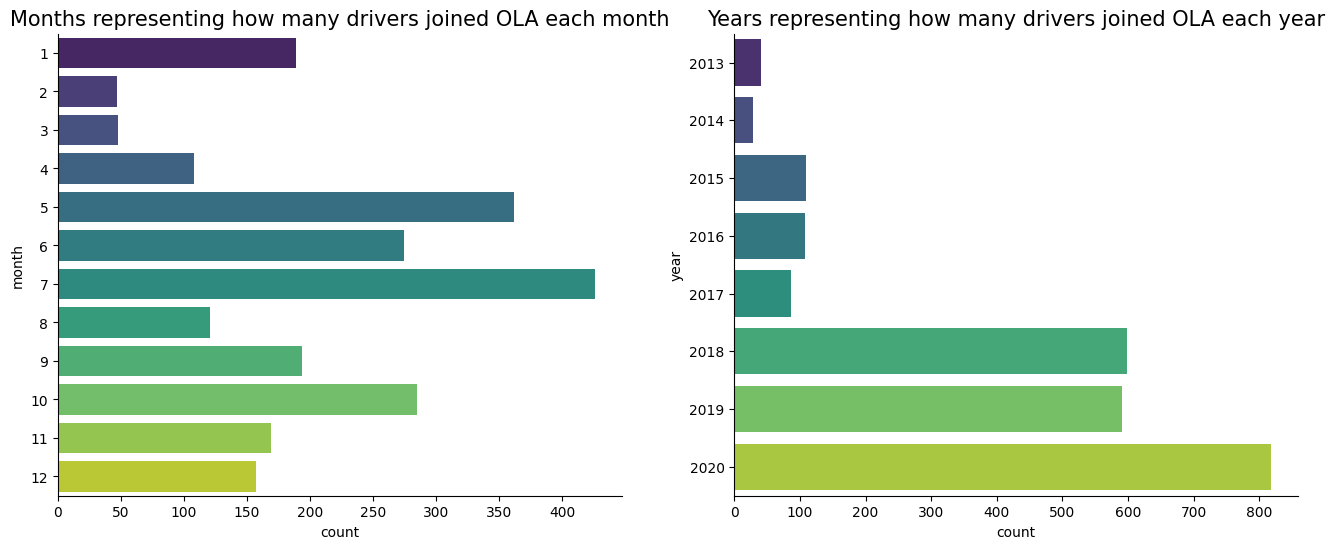

In [ ]:
# figure1
fig = plt.figure(figsize=(16,6))
ax = fig.add_subplot(1,2,1)
sns.countplot(y=df1.month, palette='viridis')
plt.title('Months representing how many drivers joined OLA each month', fontsize=15)

ax = fig.add_subplot(1,2,2)
sns.countplot(y=df1.year, palette='viridis')
plt.title('Years representing how many drivers joined OLA each year', fontsize=15)
sns.despine()
plt.show()

**Observations:**

- July received the maximum number of drivers in 8 years.
- February and March receives the least number of Drivers joining OLA.
- Joining of Drivers receives a boost of about 500% after 2017.

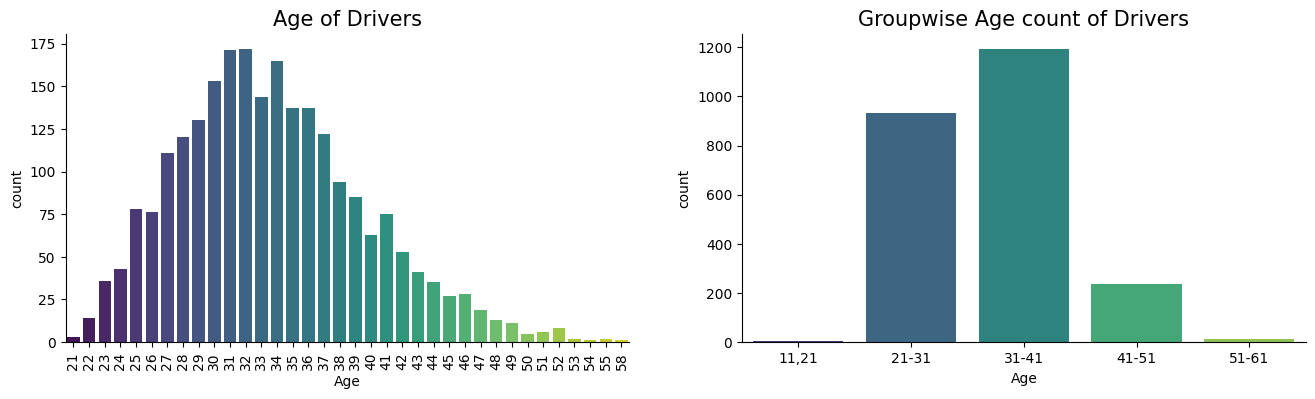

In [ ]:
# figure2
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
sns.countplot(x=df1.Age,palette='viridis',width=0.8)
plt.title('Age of Drivers', fontsize=15)
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
a = pd.cut(df1.Age,bins=[11,21,31,41,51,61],labels=['11,21','21-31','31-41','41-51','51-61'])
sns.countplot(x=a,palette='viridis')
plt.title('Groupwise Age count of Drivers', fontsize=15)
sns.despine()
plt.show()

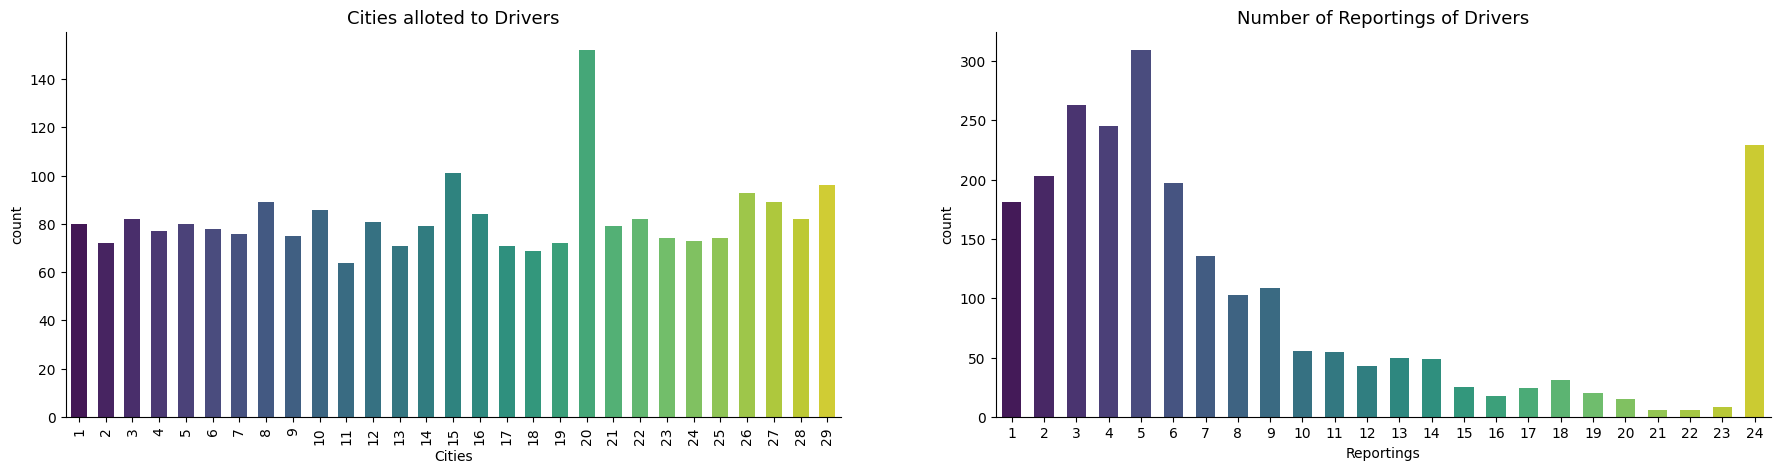

In [ ]:
# figure3
fig = plt.figure(figsize=(22,5))
ax = fig.add_subplot(121)
sns.countplot(x=df1.Cities,palette='viridis',width=0.6)
plt.title('Cities alloted to Drivers', fontsize=13)
plt.xticks(rotation=90)

ax = fig.add_subplot(122)
sns.countplot(x=df1.Reportings,palette='viridis',width=0.6)
plt.title('Number of Reportings of Drivers', fontsize=13)

# ax = fig.add_subplot(133)
# sns.countplot(x=df1.Education_Level,palette='viridis')
# plt.title('Educational Level of Drivers', fontsize=13)
sns.despine()
plt.show()


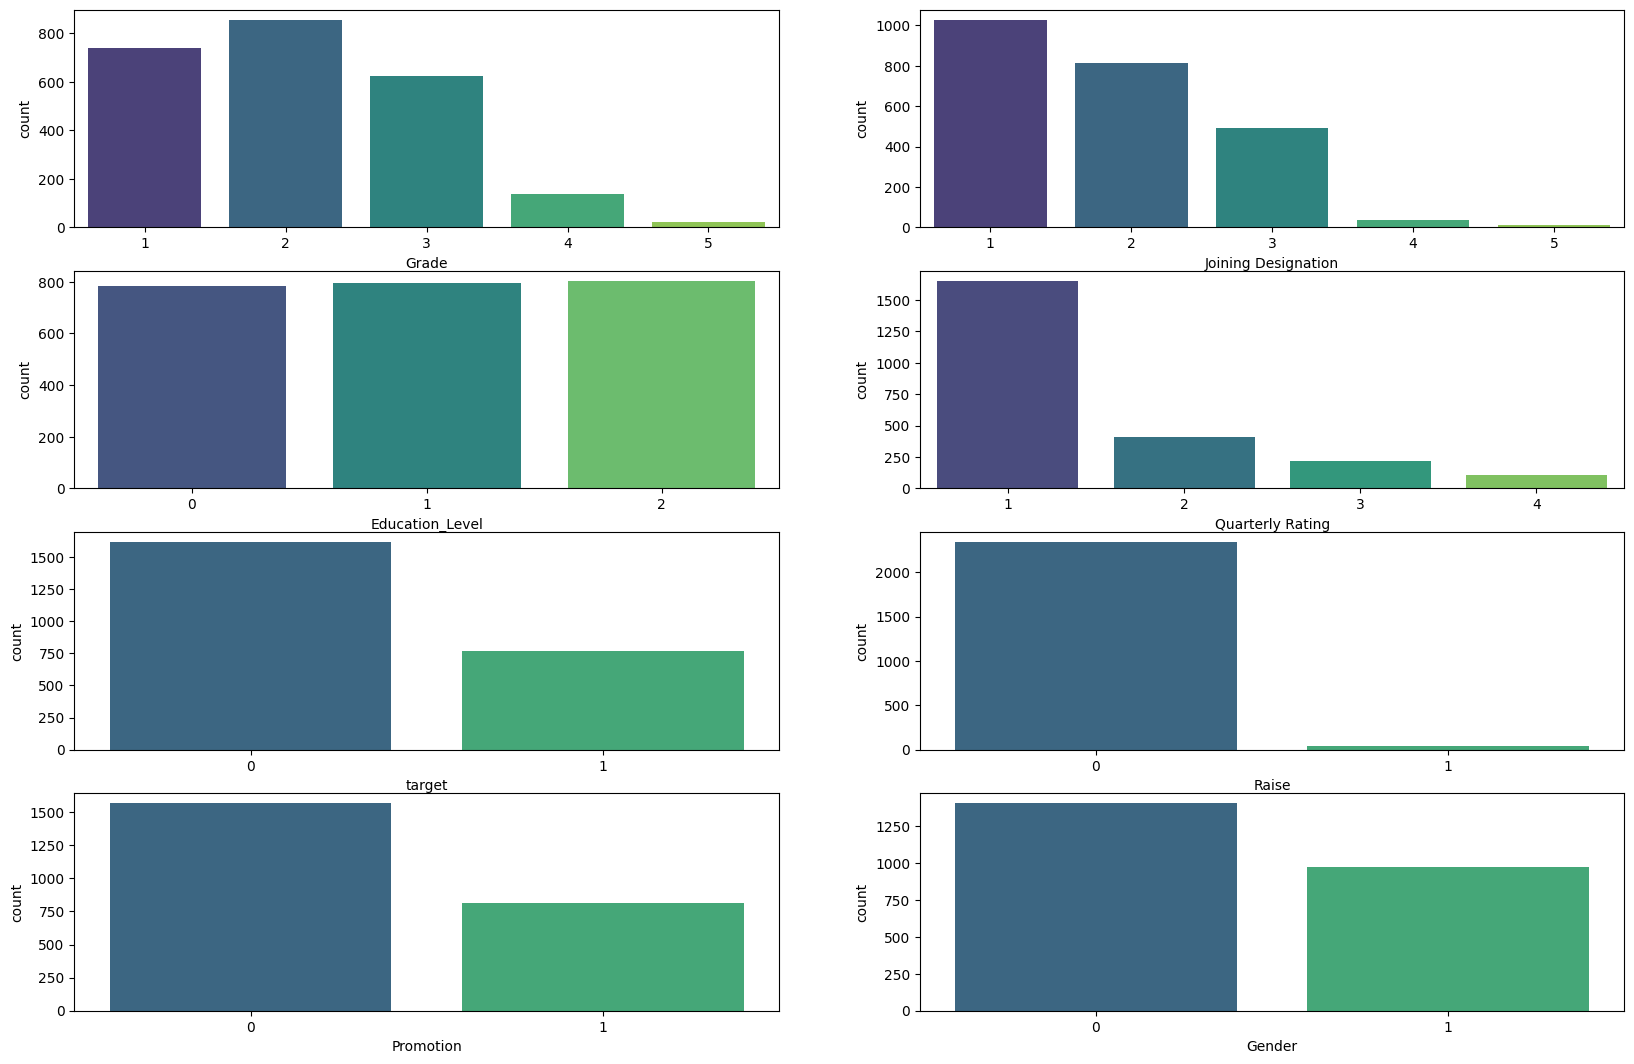

In [ ]:
# figure4
plt.figure(figsize=(20,13))
plt.subplot(4,2,1)
sns.countplot(x=df1.Grade,palette='viridis')
# plt.title('Grade given to different Drivers', fontsize=15)
plt.subplot(4,2,2)
sns.countplot(x=df1['Joining Designation'],palette='viridis')
# plt.title('Grade given to different Drivers', fontsize=15)
plt.subplot(4,2,3)
sns.countplot(x=df1.Education_Level,palette='viridis')
# plt.title('Grade given to different Drivers', fontsize=15)
plt.subplot(4,2,4)
sns.countplot(x=df1['Quarterly Rating'],palette='viridis')
# plt.title('Grade given to different Drivers', fontsize=15)
plt.subplot(4,2,5)
sns.countplot(x=df1.target,palette='viridis')
# plt.title('Grade given to different Drivers', fontsize=15)
plt.subplot(4,2,6)
sns.countplot(x=df1.Raise,palette='viridis')
# plt.title('Grade given to different Drivers', fontsize=15)
plt.subplot(4,2,7)
sns.countplot(x=df1.Promotion,palette='viridis')
# plt.title('Grade given to different Drivers', fontsize=15)
plt.subplot(4,2,8)
sns.countplot(x=df1.Gender,palette='viridis')
# plt.title('Grade given to different Drivers', fontsize=15)
plt.show()

**Observations:**

- Between 21 years(min age) to 58(max age) years of age, maximum number of drivers are 32 years o
meanwhile the age group between 31-41 years of age receives the maximum number of drivers.
- 58.9% of the Drivers are male.
- City C20 has been used by the most of the drivers.
- There are 3 Education levels and all of them alomst have the equal distribution of Drivers.
- Grade 2 has been received by most of the Drivers and then the count of grade keeps on falling.

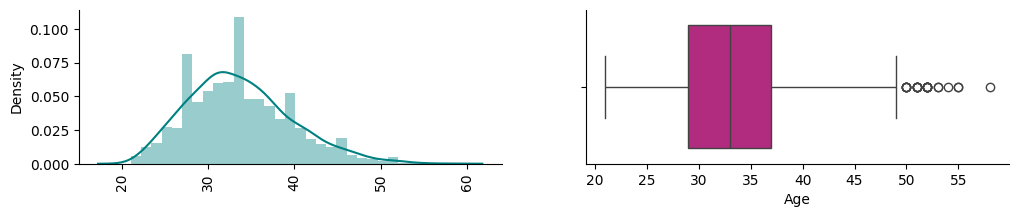

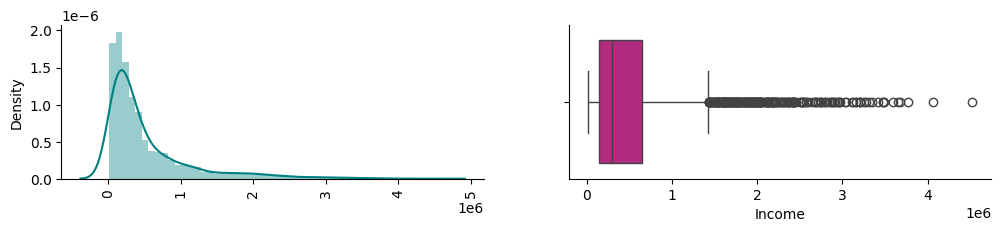

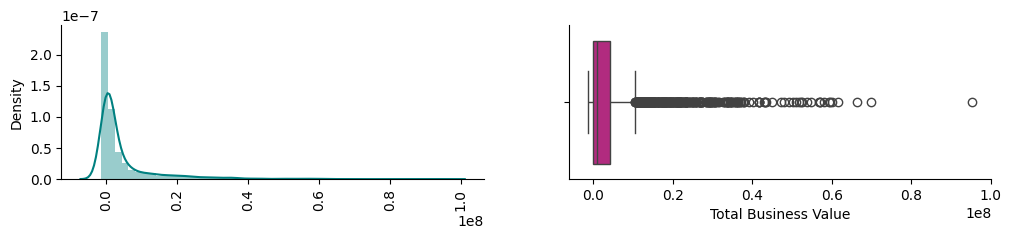

In [ ]:
a =df1[['Age','Income','Total Business Value']]
for i in a:
    plt.figure(figsize=(12,2))
    plt.subplot(121)
    sns.distplot(x=df1[i],color='teal')
    plt.title('')
    plt.xticks(rotation=90)

    plt.subplot(122)
    sns.boxplot(x=df1[i],color='mediumvioletred')
    plt.title('')
    sns.despine()
    plt.show()


**Bivariate and multivariate**

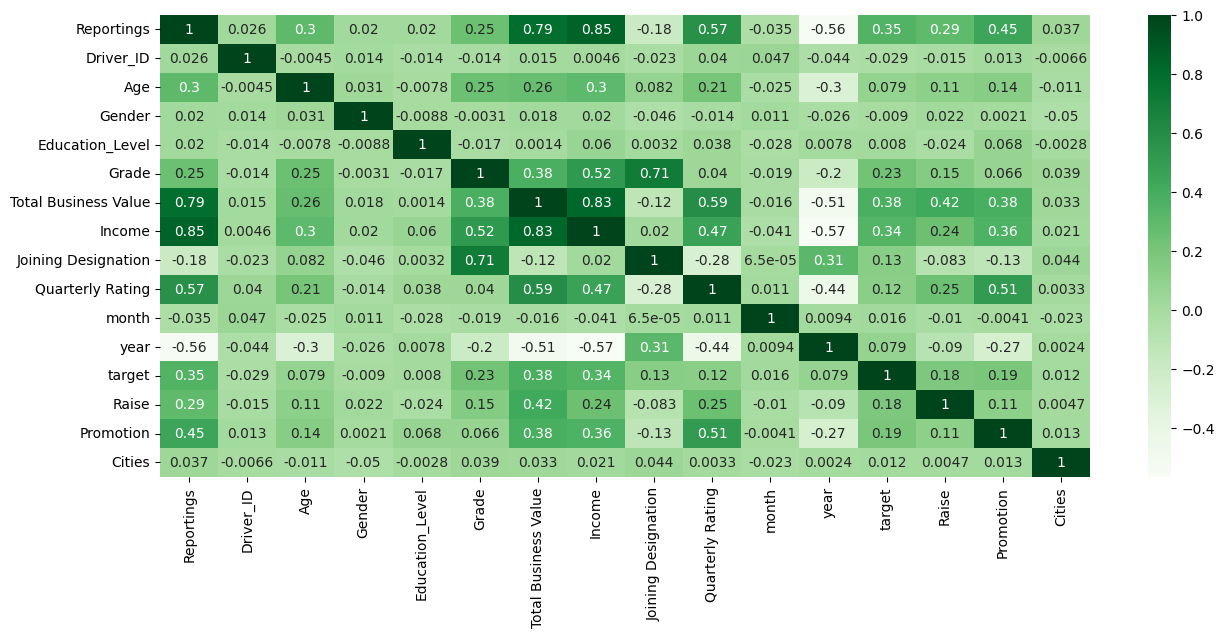

In [ ]:
corr = df1.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

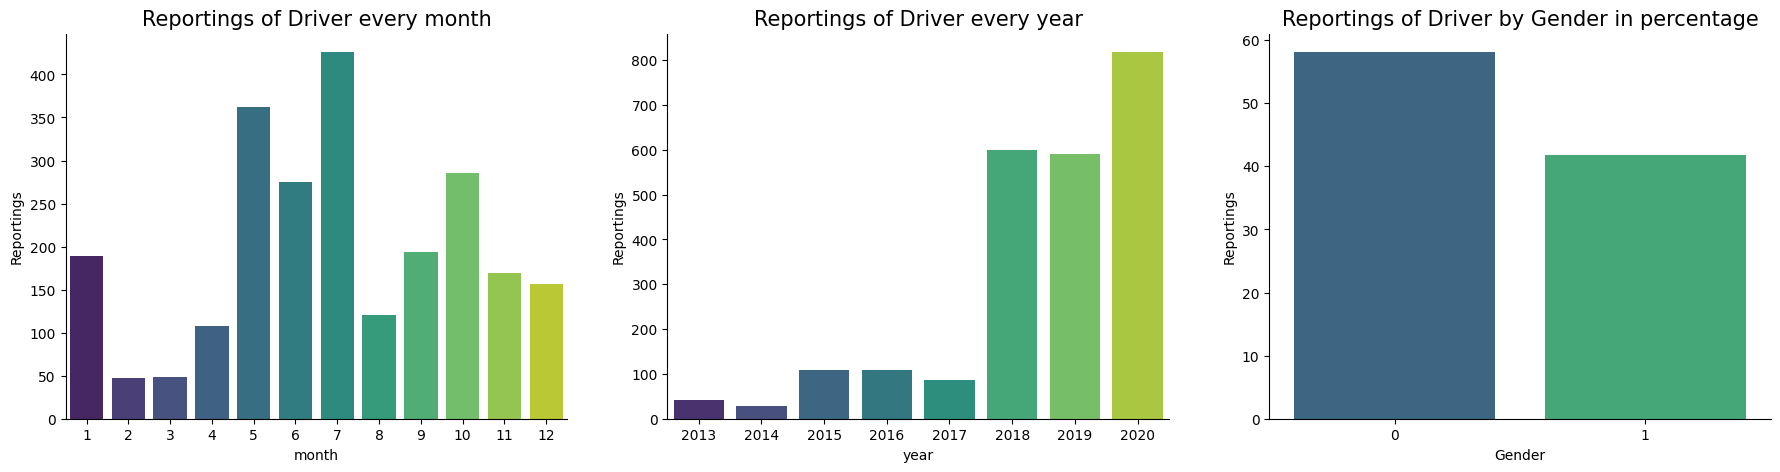

In [ ]:
fig = plt.figure(figsize=(22,5))
ax = fig.add_subplot(1,3,1)
grouped_months = df1.groupby(['month'])['Reportings'].count().reset_index()
sns.barplot(data=grouped_months,x='month',y='Reportings',palette='viridis')
plt.title('Reportings of Driver every month', fontsize=15)

ax = fig.add_subplot(1,3,2)
grouped_years = df1.groupby(['year'])['Reportings'].count().reset_index()
sns.barplot(x='year', y='Reportings', data=grouped_years,palette='viridis')
plt.title('Reportings of Driver every year', fontsize=15)

ax = fig.add_subplot(1,3,3)
grouped_gender = df1.groupby('Gender')['Reportings'].sum().reset_index()
grouped_gender['Reportings'] =(grouped_gender['Reportings']/sum(df1.Reportings)*100).round(2)
sns.barplot(x=grouped_gender['Gender'],y= grouped_gender['Reportings'],palette='viridis')
plt.title('Reportings of Driver by Gender in percentage', fontsize=15)
sns.despine()
sns.despine()
plt.show()

In [ ]:
grouped_gender

,Gender,Reportings
0,0,58.12
1,1,41.88


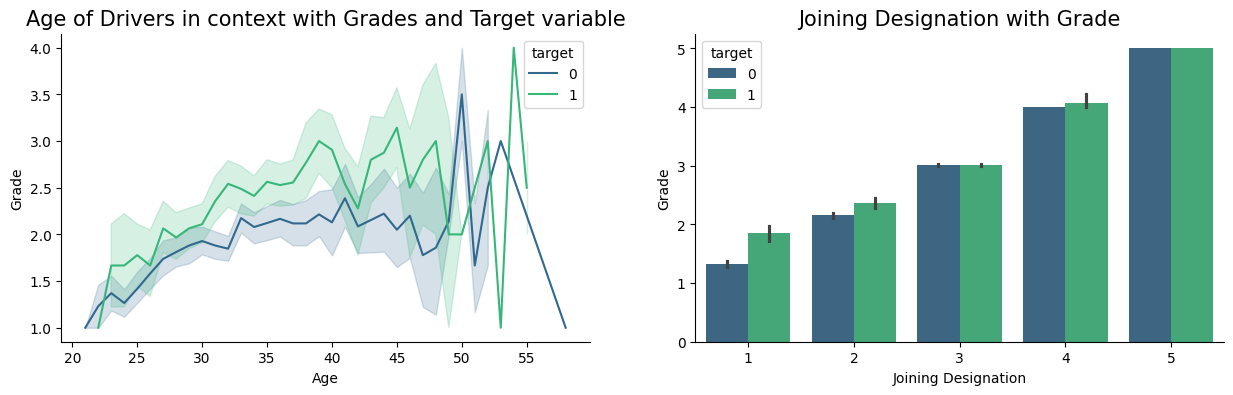

In [ ]:
fig = plt.figure(figsize=(15,4))
ax = fig.add_subplot(1,2,1)
sns.lineplot(x=df1.Age,y=df1.Grade,hue=df1.target,palette='viridis')
plt.title('Age of Drivers in context with Grades and Target variable', fontsize=15)

ax = fig.add_subplot(1,2,2)
sns.barplot(data=df1, x="Joining Designation", y="Grade",palette='viridis',hue='target')
plt.title('Joining Designation with Grade', fontsize=15)
sns.despine()
plt.show()

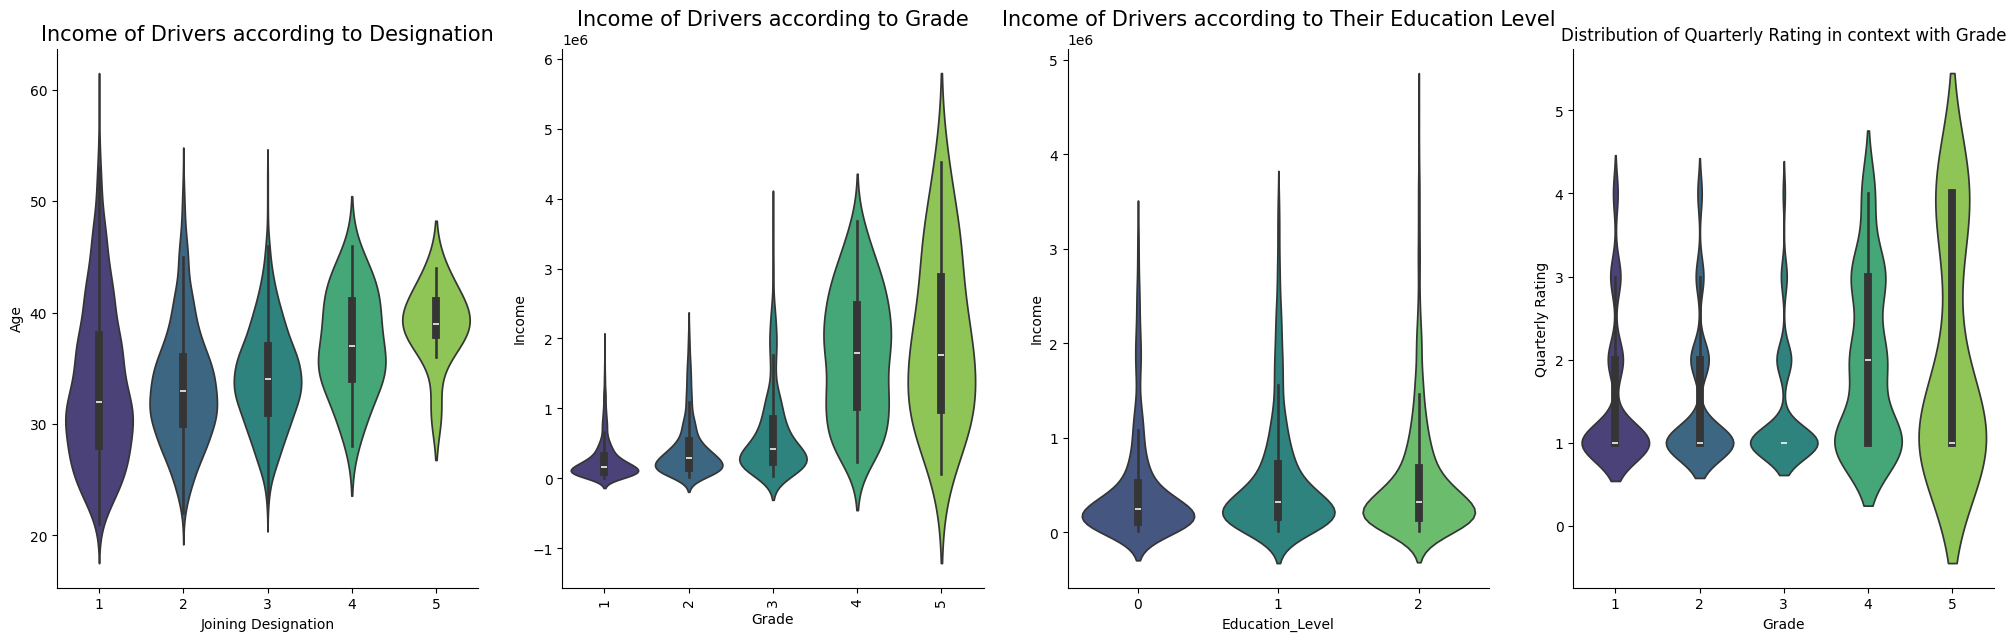

In [ ]:
# figure7
plt.figure(figsize=(25,7))
plt.subplot(1,4,1)
sns.violinplot(y=df1.Age,x=df1['Joining Designation'],palette='viridis')
plt.title('Income of Drivers according to Designation', fontsize=15)
plt.subplot(1,4,2)
sns.violinplot(x=df1.Grade,y=df1.Income,palette='viridis')
plt.title('Income of Drivers according to Grade', fontsize=15)
plt.xticks(rotation=90)
plt.subplot(1,4,3)
sns.violinplot(x=df1.Education_Level,y=df1.Income,palette='viridis')
plt.title('Income of Drivers according to Their Education Level', fontsize=15)
plt.subplot(1,4,4)
sns.violinplot(x=df1['Grade'],y=df1["Quarterly Rating"],palette='viridis')
plt.title('Distribution of Quarterly Rating in context with Grade')
sns.despine()
sns.despine()
plt.show()

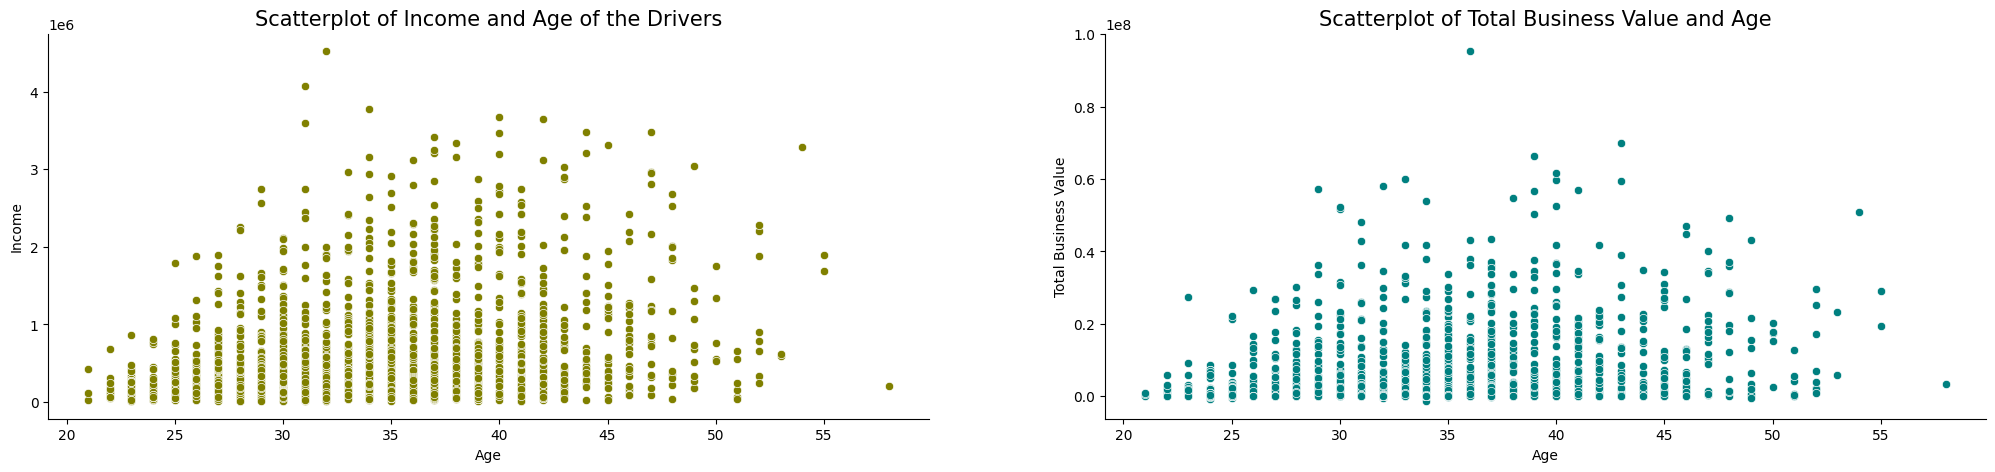

In [ ]:
plt.figure(figsize=(25,5))
plt.subplot(1,2,1)
sns.scatterplot(x=df1.Age,y=df1.Income,color='olive')
plt.title('Scatterplot of Income and Age of the Drivers', fontsize=15)
plt.subplot(1,2,2)
sns.scatterplot(x=df1.Age,y=df1['Total Business Value'],color='teal')
plt.title('Scatterplot of Total Business Value and Age', fontsize=15)
sns.despine()
plt.show()

In [ ]:
grouped_gender = df1.groupby('Gender')['Income'].sum().reset_index()
grouped_education = df1.groupby('Education_Level')['Income'].sum().reset_index()
grouped_grade = df1.groupby('Grade')['Income'].sum().reset_index()
grouped_desig = df1.groupby('Joining Designation')['Income'].sum().reset_index()
grouped_QR = df1.groupby('Quarterly Rating')['Income'].sum().reset_index()
grouped_target = df1.groupby('target')['Income'].sum().reset_index()
grouped_raise = df1.groupby('Raise')['Income'].sum().reset_index()
grouped_promote = df1.groupby('Promotion')['Income'].sum().reset_index()

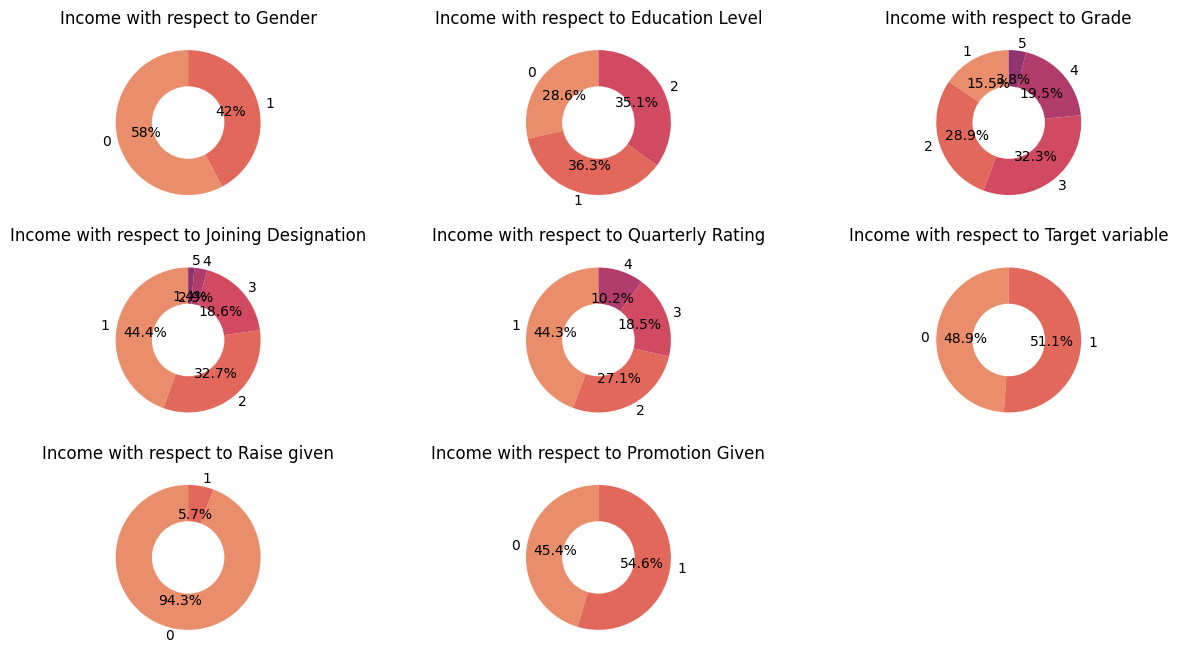

In [ ]:
plt.figure(figsize=(15,8))
plt.subplot(3,3,1)
plt.pie(grouped_gender['Income'], labels=grouped_gender['Gender'], autopct='%1.f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Gender')
plt.subplot(3,3,2)
plt.pie(grouped_education['Income'], labels=grouped_education['Education_Level'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Education Level')
plt.subplot(3,3,3)
plt.pie(grouped_grade['Income'], labels=grouped_grade['Grade'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Grade')
plt.subplot(3,3,4)
plt.pie(grouped_desig['Income'], labels=grouped_desig['Joining Designation'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Joining Designation')
plt.subplot(3,3,5)
plt.pie(grouped_QR['Income'], labels=grouped_QR['Quarterly Rating'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Quarterly Rating')
plt.subplot(3,3,6)
plt.pie(grouped_target['Income'], labels=grouped_target['target'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Target variable')
plt.subplot(3,3,7)
plt.pie(grouped_raise['Income'], labels=grouped_raise['Raise'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Raise given')
plt.subplot(3,3,8)
plt.pie(grouped_promote['Income'], labels=grouped_promote['Promotion'], autopct='%1.1f%%', startangle=90,colors=sns.color_palette('flare'))
hole = plt.Circle((0, 0), 0.5, facecolor='white')
plt.gcf().gca().add_artist(hole)
plt.title('Income with respect to Promotion Given')
sns.despine()
plt.show()

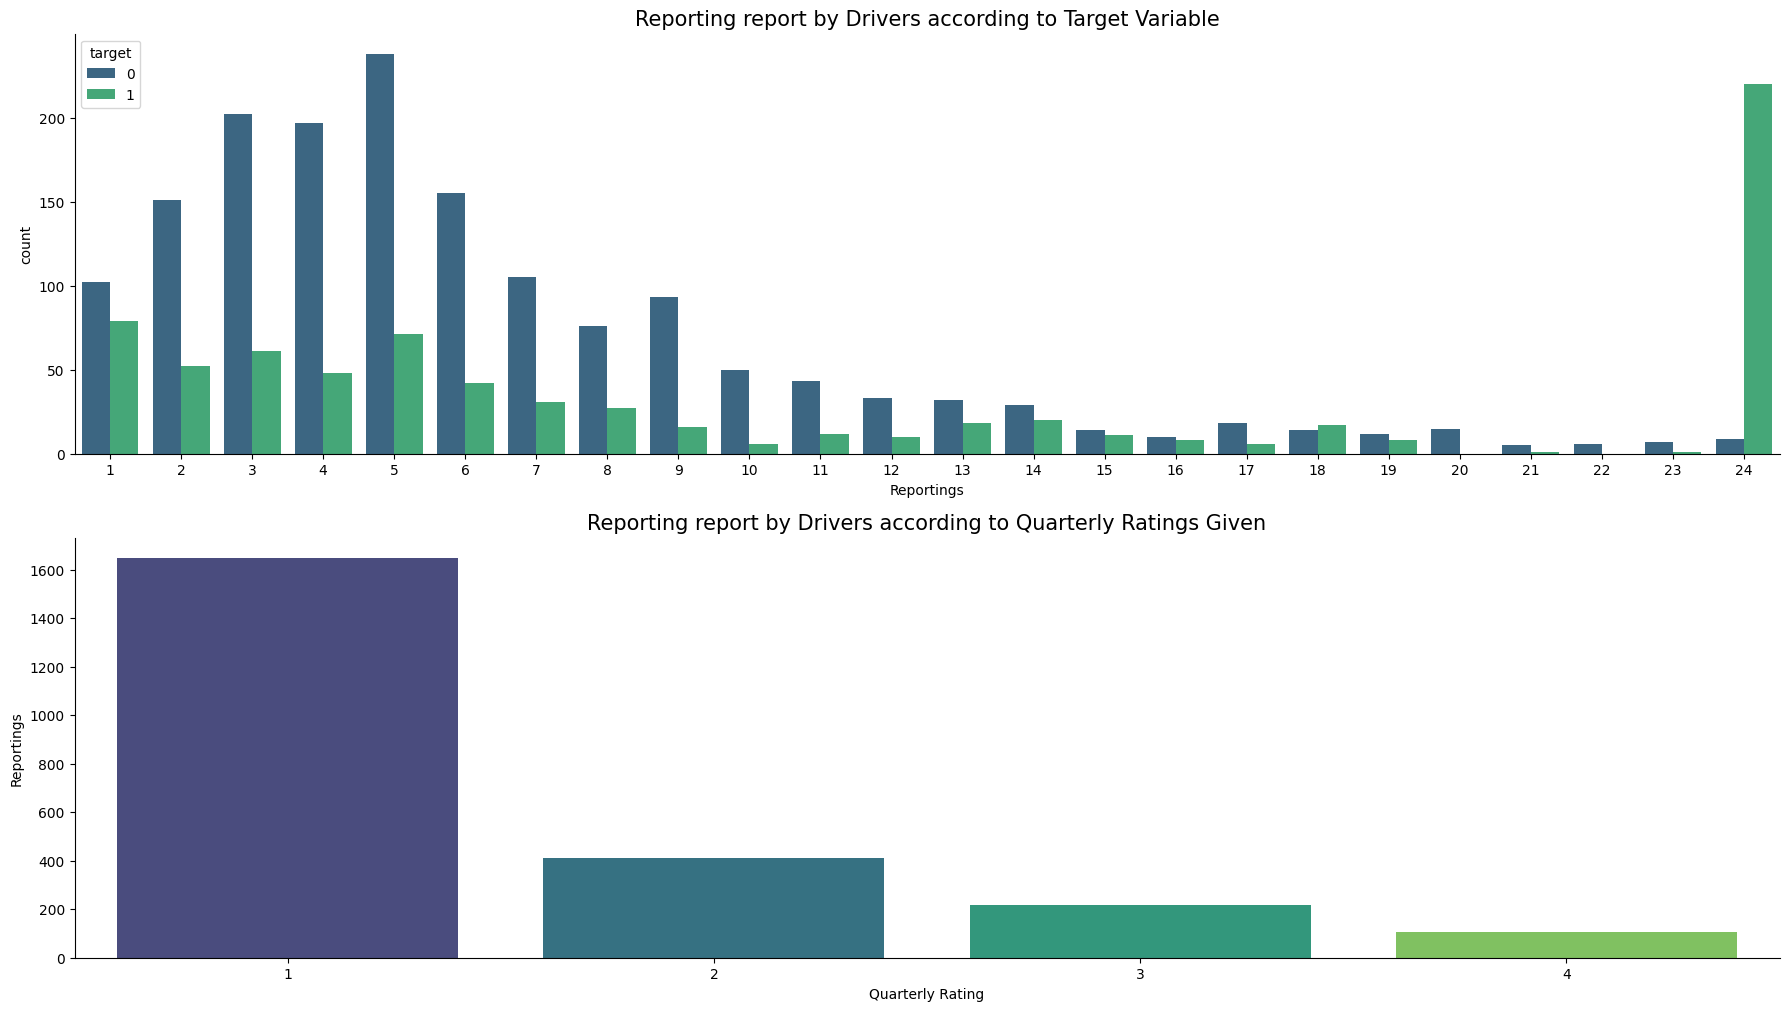

In [ ]:
plt.figure(figsize=(22,12))
plt.subplot(2,1,1)
sns.countplot(x=df1['Reportings'],hue=df1.target,palette='viridis')
plt.title('Reporting report by Drivers according to Target Variable', fontsize=15)
plt.subplot(2,1,2)
grouped_rating = df1.groupby('Quarterly Rating')['Reportings'].count().reset_index()
sns.barplot(data = grouped_rating,y='Reportings',x='Quarterly Rating',palette='viridis')
plt.title('Reporting report by Drivers according to Quarterly Ratings Given', fontsize=15)
sns.despine()
plt.show()

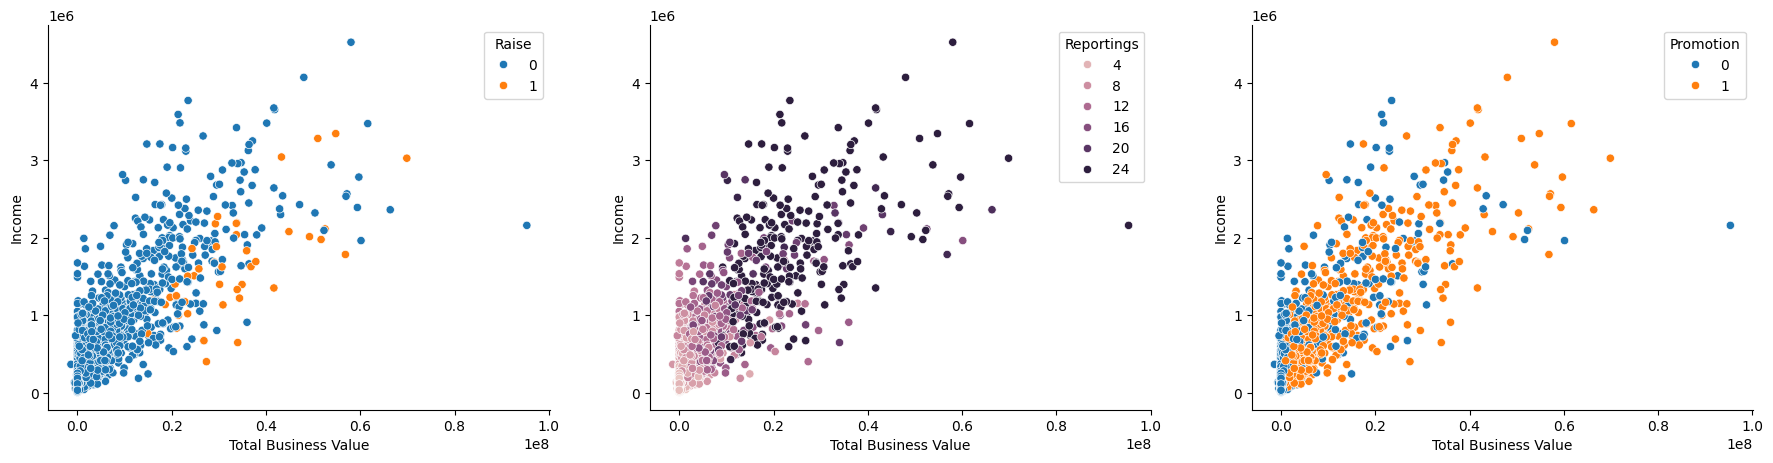

In [ ]:
plt.figure(figsize=(22,5))
plt.subplot(1,3,1)
sns.scatterplot(x=df1['Total Business Value'],y=df1.Income,hue=df1.Raise)
plt.subplot(1,3,2)
sns.scatterplot(x=df1['Total Business Value'],y=df1.Income,hue=df1.Reportings)
plt.subplot(1,3,3)
sns.scatterplot(x=df1['Total Business Value'],y=df1.Income,hue=df1.Promotion)
sns.despine()
plt.show()

**Observation:-**

*   So we see that there are 57% male employees and 43% female employees.

*   The percentages of employees with different education levels are almost same for level 1 & 2.

*   97.3% of the employees who did not get a raise.

*   Almost 43% of the employees joined at lowest designation (1). 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.

*   Majority (35%) of the employees currently are at designation level 2, followed by designation level 1 (31%) and 3 (26%). Less than 5% of the employees are currently in higher designations.

*   Only 54.6% of the employees received a promotion, while 45.4% did not. However, only 2.6% received a raise in income.

*   Number of employees has been increase with increase in year as well as number of reportings.

*   The majority of the employees seem to be associated with city C20.

*   Scatter plot of Income shows that Income increases with increase in age but after 45-50, we see a subtle decline.

*   Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.

*   Income decreses with increase in Destination as about 4% of the employees hold higher designations.

*   The median of the Income for employees having higher Grades is greater.
Distribution of Income for enployes at different Education level is about a change of 3-5% with level 0.

*   Joining Designation Increases with increase in Grade.

*   Max reporting days is 24 days.

*   About 55% of the reportings of the employees has got Quarlerly Rating 1.

*   Number of reportings increases with increase in Income as well as Total Business Value.


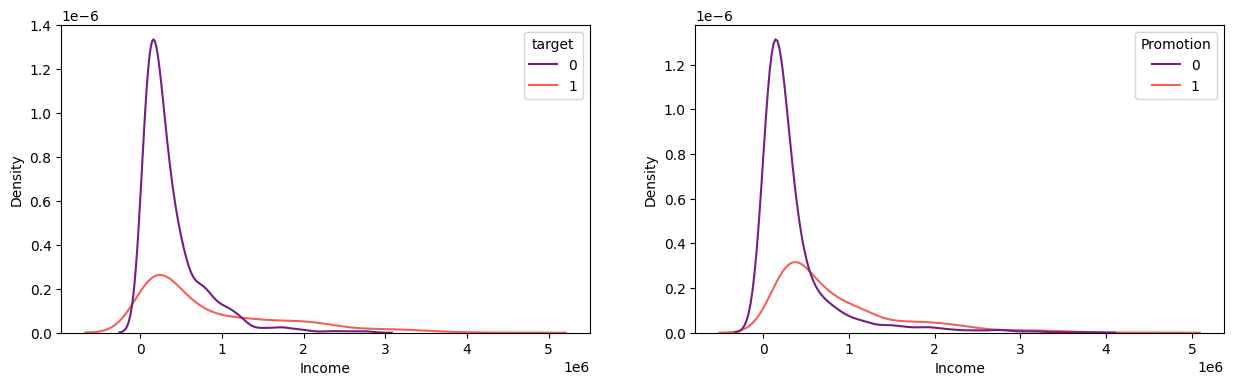

In [ ]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
sns.kdeplot(x=df1.Income,hue=df1['target'],palette='magma')
plt.subplot(1,2,2)
sns.kdeplot(x=df1.Income,hue=df1['Promotion'],palette='magma')
plt.show()

**OUTLIER TREATMENT**

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,2381.0,8.023520e+00,6.783590e+00,1.0,3.0,5.0,10.0,24.0
Driver_ID,2381.0,1.397559e+03,8.061616e+02,1.0,695.0,1400.0,2100.0,2788.0
Age,2381.0,3.366317e+01,5.983375e+00,21.0,29.0,33.0,37.0,58.0
Gender,2381.0,4.103318e-01,4.919972e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,2381.0,1.007560e+00,8.162900e-01,0.0,0.0,1.0,2.0,2.0
Grade,2381.0,2.096598e+00,9.415218e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,2381.0,4.586742e+06,9.127115e+06,-1385530.0,0.0,817680.0,4173650.0,95331060.0
Income,2381.0,5.267603e+05,6.231633e+05,10883.0,139895.0,292980.0,651456.0,4522032.0
Joining Designation,2381.0,1.820244e+00,8.414334e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,2381.0,1.486350e+00,8.343483e-01,1.0,1.0,1.0,2.0,4.0


In [ ]:
len(df1[df1['Total Business Value'] < 1])

729

As we can notice Total Business Value column has some values in negative.

We consider them as outlier which will affect the results of the our machine learning model.

Considering the parts of datasets that has Total Business Value > 1.

There are exactly 729 Driver having Total Business Value that less than 1.

In [ ]:
df1= df1[df1['Total Business Value'] > 1]

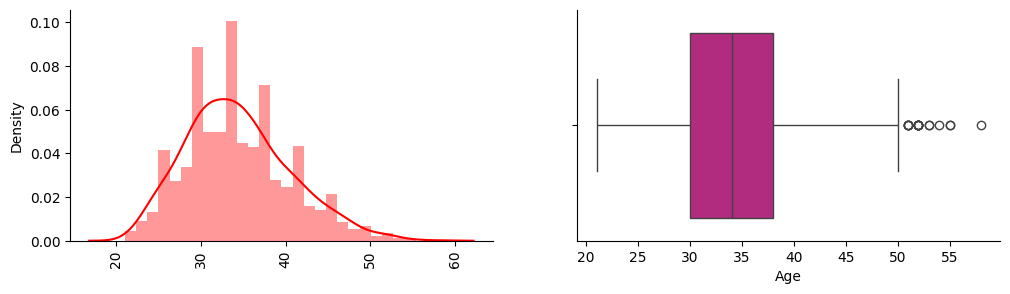

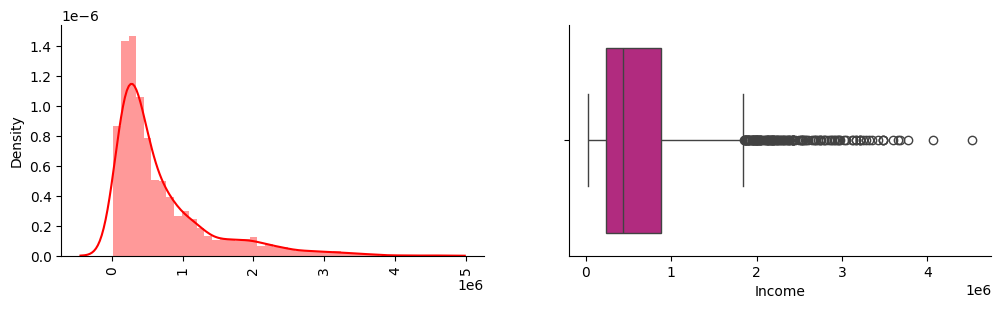

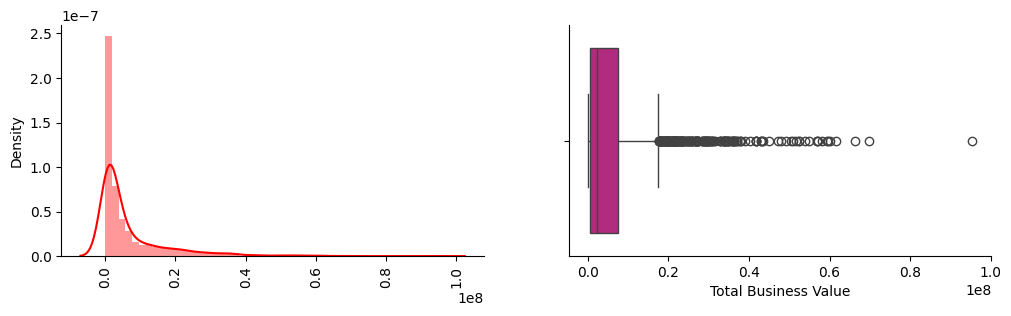

In [ ]:
a = df1[['Age','Income','Total Business Value']]
for i in a:
    plt.figure(figsize=(12,3))
    plt.subplot(121)
    sns.distplot(x=df1[i],color='red')
    plt.xticks(rotation=90)
#     plt.figure(figsize=(9,5))
    plt.subplot(122)
    sns.boxplot(x=df1[i],color='mediumvioletred')
    sns.despine()
    plt.show()

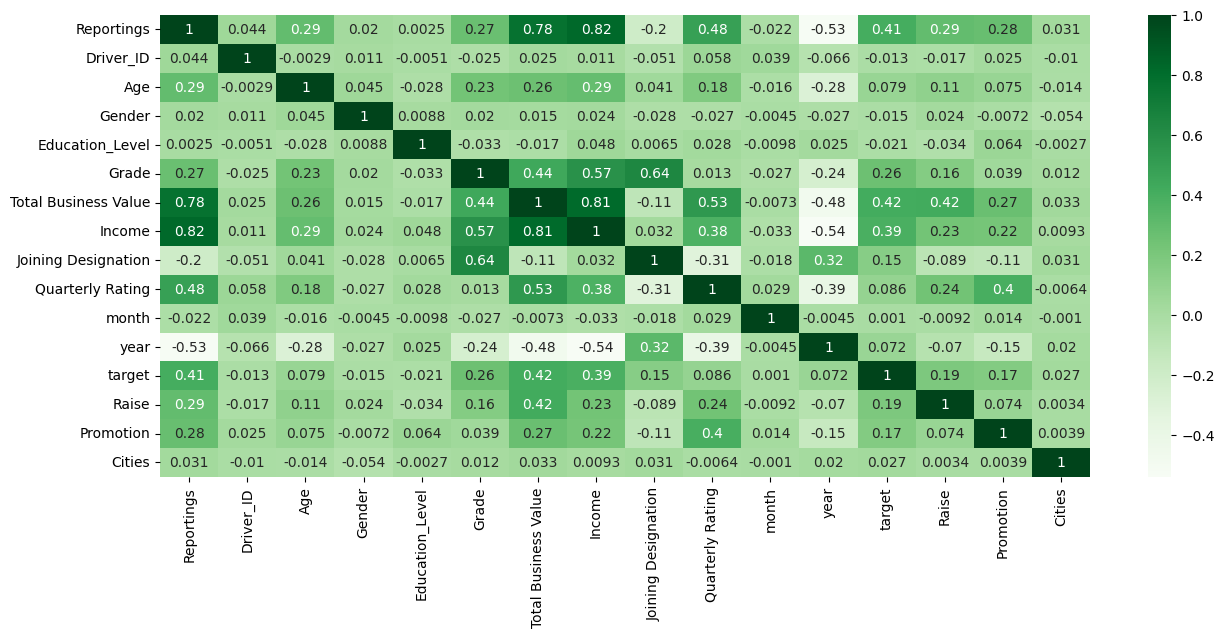

In [ ]:
corr = df1.corr()
plt.figure(figsize=(15,6))
sns.heatmap(corr,annot=True,cmap='Greens')
plt.show()

In [ ]:
df1.describe().T

,count,mean,std,min,25%,50%,75%,max
Reportings,1652.0,1.026998e+01,6.967589e+00,1.0,5.0,8.0,14.0,24.0
Driver_ID,1652.0,1.390315e+03,8.082919e+02,1.0,679.5,1385.0,2097.0,2788.0
Age,1652.0,3.432385e+01,6.190776e+00,21.0,30.0,34.0,38.0,58.0
Gender,1652.0,4.158596e-01,4.930188e-01,0.0,0.0,0.0,1.0,1.0
Education_Level,1652.0,1.030872e+00,8.093284e-01,0.0,0.0,1.0,2.0,2.0
Grade,1652.0,2.144068e+00,9.719606e-01,1.0,1.0,2.0,3.0,5.0
Total Business Value,1652.0,6.613094e+06,1.032794e+07,19580.0,663022.5,2242080.0,7418392.5,95331060.0
Income,1652.0,6.864932e+05,6.814522e+05,20886.0,236652.5,428960.0,877151.0,4522032.0
Joining Designation,1652.0,1.759685e+00,8.395129e-01,1.0,1.0,2.0,2.0,5.0
Quarterly Rating,1652.0,1.700363e+00,9.237035e-01,1.0,1.0,1.0,2.0,4.0


**Correlation Analysis**

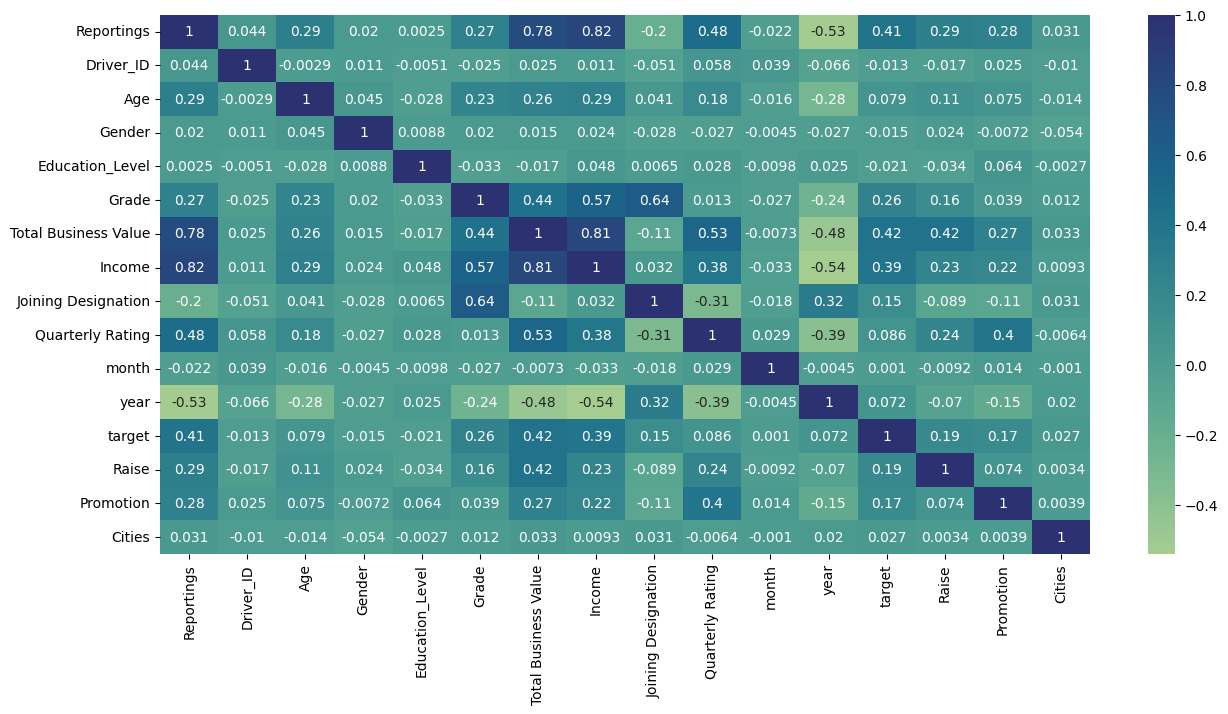

In [ ]:
plt.figure(figsize=(15, 7))

sns.heatmap(df1.corr(method="pearson"), annot=True, cmap="crest")
plt.show()

**Insights**

*   Income and Grade is highly correlated

*   Joining Designation and Grade is highly correlated

*   Total Business value and salary increament is correlated

**ENSEMBLE LEARNING:-**

**Bagging & Boosting**

**Data Prepration:-**


The Trade-Off In general while choosing a model, we might choose to look at precision and recall scores and choose while keeping the follwing trade-off on mind : -

If we prioritize precision, we are going to reduce our false positives. This may be useful if our targeted retention strategies prove to be expensive. We don’t want to spend unnecessarily on somebody who is not even going to leave in the first place. Also, it might lead to uncomfortable situation for the employee themselves if they are put in a situation where it is assumed that they are going to be let go/ going to leave. • If we prioritize recall, we are going to reduce our false negatives. This is useful since usually the cost of hiring a new person is higher than retaining n experienced person. So, by reducing false negatives, we would be able to better identify those who are actually going to leave and try to retain them by appropriate measures (competitve remuneration, engagement program, etc).

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [ ]:
X = df1.drop('target',axis=1)
y = df1['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state= 42)

In [ ]:
from sklearn.model_selection import learning_curve
def plot_learning_curve(estimator, X, Y, title):
    train_sizes, train_scores, test_scores, _, _ = learning_curve(estimator,X,Y,return_times=True)
    fig, axes = plt.subplots(1, 1, figsize = (15, 5))
    axes.set_title(title)
    axes.plot
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    # Plot learning curve
#     32
    axes.grid()
    axes.fill_between(
    train_sizes,
    train_scores_mean - train_scores_std,
    train_scores_mean + train_scores_std,
    alpha=0.1,
    color="r",
    )
    axes.fill_between(
    train_sizes,
    test_scores_mean - test_scores_std,
    test_scores_mean + test_scores_std,
    alpha=0.1,
    color="g",
    )
    axes.plot(
    train_sizes, train_scores_mean, "o-", color="r", label="Training score"
    )
    axes.plot(
    train_sizes, test_scores_mean, "o-", color="g", label="Cross-validation score"
    )
    axes.legend(loc="best")
    plt.show()

In [ ]:
X.head()

,Reportings,Driver_ID,Age,Gender,Education_Level,Grade,Total Business Value,Income,Joining Designation,Quarterly Rating,month,year,Raise,Promotion,Cities
0,3,1,28,0,2,1,1715580,172161,1,2,12,2018,0,0,23
2,5,4,43,0,2,2,350000,328015,2,1,11,2019,0,0,13
3,3,5,29,0,0,1,120360,139104,1,1,12,2019,0,0,9
4,5,6,31,1,1,3,1265000,393640,3,1,12,2020,0,1,11
7,6,12,35,0,2,1,2607180,168696,1,4,1,2019,0,1,23


In [ ]:
ss= StandardScaler()
ss.fit_transform(X_train)

array([[-0.61446611, -1.09640018,  1.70794584, ..., -0.16737851,
         1.023749  , -0.04979913],
       [ 1.93718866, -1.32951199,  1.54780698, ..., -0.16737851,
        -0.97680193, -0.5247786 ],
       [-0.18919032, -1.0914666 ,  0.26669606, ..., -0.16737851,
         1.023749  ,  1.25639439],
       ...,
       [-0.75622471,  0.03585718, -1.49483144, ..., -0.16737851,
        -0.97680193, -0.88101319],
       [ 0.51960268,  1.32105562, -1.33469258, ..., -0.16737851,
         1.023749  , -1.59348238],
       [-0.33094892,  0.60815284, -0.69413712, ..., -0.16737851,
        -0.97680193, -0.28728886]])

In [ ]:
from sklearn.model_selection import cross_validate

In [ ]:
valid1 = cross_val_score(LogisticRegression(),X,y,cv=5)
print('Logistic Regression:',valid1.round(2))
print('Mean:',valid1.mean())
valid2 = cross_val_score( DecisionTreeClassifier(),X,y,cv=5)
print('Decision Tree:',valid2.round(3))
print('Mean:',valid2.mean())
valid3 = cross_val_score(RandomForestClassifier(),X,y,cv=5)
print('RandomForestClassifier():',valid3.round(2))
print('Mean:',valid3.mean())
valid4 = cross_val_score(GradientBoostingClassifier(),X,y,cv=5)
print('GradientBoostingClassifier:',valid4.round(3))
print('Mean:',valid4.mean())
valid5 =cross_val_score(XGBClassifier(),X,y,cv=5)
print('XGBoostClassifier:',valid1.round(2))
print('Mean:',valid5.mean())

Logistic Regression: [0.7  0.75 0.75 0.75 0.76]
Mean: 0.7415453629955141
Decision Tree: [0.858 0.87  0.855 0.852 0.83 ]
Mean: 0.8528920626201593
RandomForestClassifier(): [0.9  0.9  0.89 0.88 0.91]
Mean: 0.8964844822850866
GradientBoostingClassifier: [0.888 0.921 0.885 0.87  0.848]
Mean: 0.882539595349263
XGBoostClassifier: [0.7  0.75 0.75 0.75 0.76]
Mean: 0.879520278311819


**Model building**

**MACHINE LEARNING MODEL:-**



**WITHOUT THE TREATMENT OF CLASS IMBALANCE**



**Random Forest Classifier**

In [ ]:
# model = RandomForestClassifier()
# param_grid = {
#     'n_estimators':list(range(10,20)),
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

In [ ]:
# clf = GridSearchCV(model,param_grid,cv=10,scoring='recall')
# clf.fit(X_train,y_train)

In [ ]:
# clf.best_params_

In [ ]:
rf_clf1 = RandomForestClassifier(criterion='gini',max_depth=7,max_features='sqrt',n_estimators=10)
rf_clf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=10)

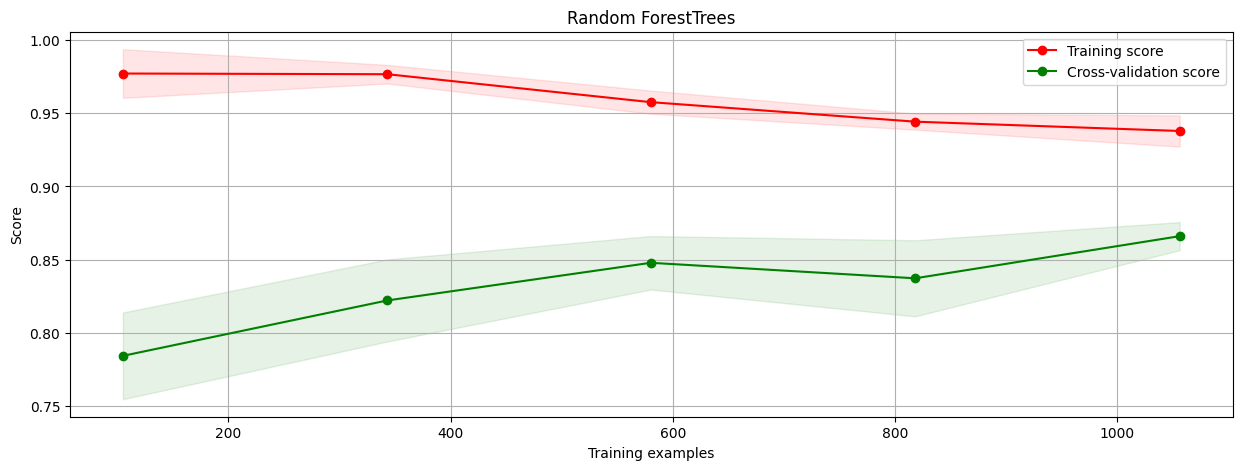

In [ ]:
plot_learning_curve(rf_clf1, X_train, y_train, "Random ForestTrees")

**Results Evaluation**

**roc_auc_score**

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model. It helps evaluate and compare different models by illustrating the trade-off between the true positive rate (TPR) and false positive rate (FPR) at various classification thresholds.

The ROC curve is created by plotting the TPR on the y-axis against the FPR on the x-axis for different threshold values.

*   TPR: Also known as sensitivity or recall, is the proportion of true positive predictions out of all actual positive instances.
*   FPR: Proportion of false positive predictions out of all actual negative instances.
A perfect classifier would have a TPR of 1 and an FPR of 0, resulting in a point at the top-left corner of the ROC curve. On the other hand, a random classifier would have an ROC curve following the diagonal line, as it has an equal chance of producing true positive and false positive predictions.

The area under the ROC curve (AUC) is a commonly used metric to quantify the overall performance of a classifier.

In [ ]:
y_pred = rf_clf1.predict(X_test)
proba = rf_clf1.predict_proba(X_test)[:,1]
print("Train data accuracy:",rf_clf1.score(X_train, y_train))
print("Test data accuracy:",rf_clf1.score(X_test,y_test))
print('Accuracy of the model:', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*70)
print(classification_report(y_test, y_pred))
print('-'*70)
cm1 = (confusion_matrix(y_test, y_pred))
print('Confusion Metrix')
print(confusion_matrix(y_test, y_pred))

Train data accuracy: 0.9303557910673732
Test data accuracy: 0.8700906344410876
Accuracy of the model: 0.8700906344410876
ROC-AUC score test dataset:  0.9356981455508804
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.88      0.91      0.90       207
           1       0.85      0.80      0.82       124

    accuracy                           0.87       331
   macro avg       0.86      0.86      0.86       331
weighted avg       0.87      0.87      0.87       331

----------------------------------------------------------------------
Confusion Metrix
[[189  18]
 [ 25  99]]


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.91      0.90       207
           1       0.85      0.80      0.82       124

    accuracy                           0.87       331
   macro avg       0.86      0.86      0.86       331
weighted avg       0.87      0.87      0.87       331



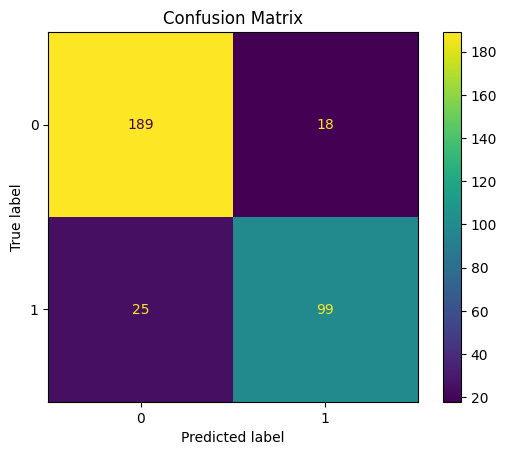

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

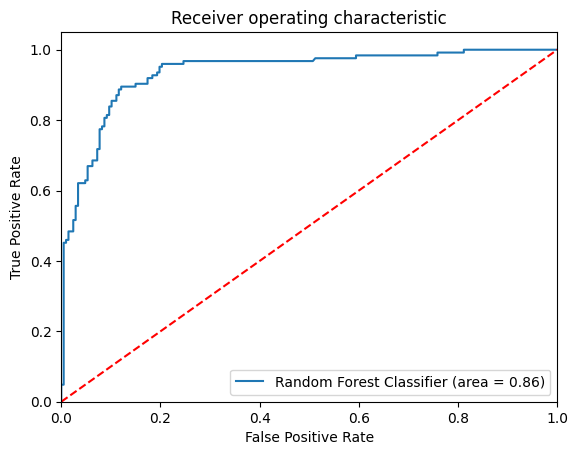

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, proba)  # Remove the second index
plt.figure()
plt.plot(fpr, tpr, label='Random Forest Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
rf_clf_imp1 = rf_clf1.feature_importances_

**XG Boosting Classifier**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# Assuming X_train, y_train, and X_test are defined
gbc1 = GradientBoostingClassifier()
gbc1.fit(X_train, y_train)

# Now you can use gbc1 to make predictions or calculate probabilities
y_pred = gbc1.predict(X_test)
proba = gbc1.predict_proba(X_test)[:, 1]


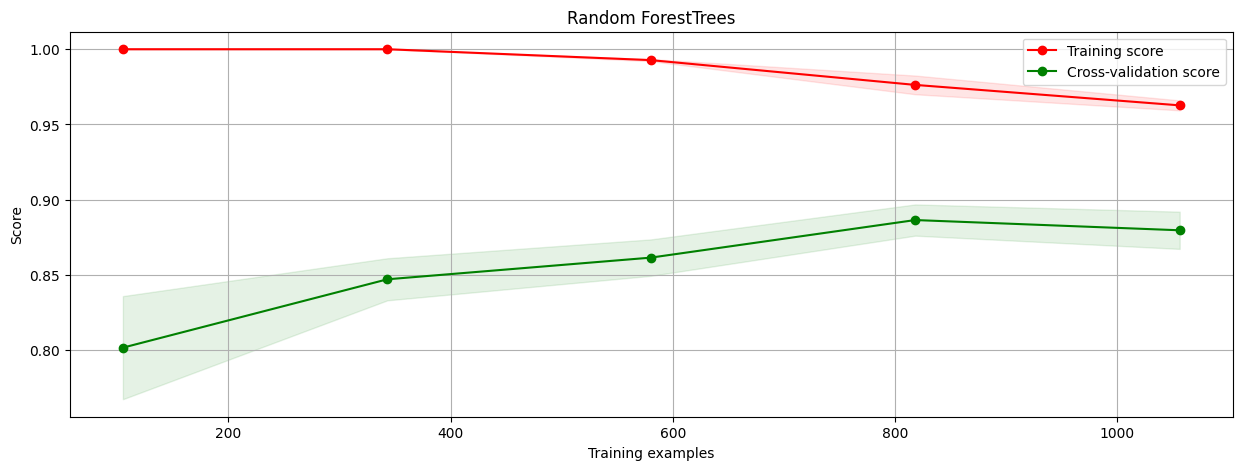

In [ ]:
plot_learning_curve(gbc1, X_train, y_train, "Random ForestTrees")

In [ ]:
gbc_clf_imp1 = gbc1.feature_importances_

**Results Evaluation**

**roc_auc_score**

The Receiver Operating Characteristic (ROC) curve is a graphical representation of the performance of a binary classification model. It helps evaluate and compare different models by illustrating the trade-off between the true positive rate (TPR) and false positive rate (FPR) at various classification thresholds.

The ROC curve is created by plotting the TPR on the y-axis against the FPR on the x-axis for different threshold values.

*   TPR: Also known as sensitivity or recall, is the proportion of true positive predictions out of all actual positive instances.
*   FPR: Proportion of false positive predictions out of all actual negative instances.
A perfect classifier would have a TPR of 1 and an FPR of 0, resulting in a point at the top-left corner of the ROC curve. On the other hand, a random classifier would have an ROC curve following the diagonal line, as it has an equal chance of producing true positive and false positive predictions.

The area under the ROC curve (AUC) is a commonly used metric to quantify the overall performance of a classifier.

In [ ]:
print('Train Score : ', gbc1.score(X_train, y_train))
print('Test Score : ', gbc1.score(X_test, y_test))
print('Accuracy Score : ', accuracy_score(y_test, y_pred))
print("ROC-AUC score test dataset: ", roc_auc_score(y_test, proba))
print('-'*60)
print(classification_report(y_test, y_pred))
print('-'*60)
print('Confusion Matrix')
cm2 = (confusion_matrix(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print('-'*60)

Train Score :  0.9553368660105981
Test Score :  0.9003021148036254
Accuracy Score :  0.9003021148036254
ROC-AUC score test dataset:  0.9492753623188406
------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.91      0.94      0.92       207
           1       0.89      0.84      0.86       124

    accuracy                           0.90       331
   macro avg       0.90      0.89      0.89       331
weighted avg       0.90      0.90      0.90       331

------------------------------------------------------------
Confusion Matrix
[[194  13]
 [ 20 104]]
------------------------------------------------------------


**Classification Report**

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.94      0.92       207
           1       0.89      0.84      0.86       124

    accuracy                           0.90       331
   macro avg       0.90      0.89      0.89       331
weighted avg       0.90      0.90      0.90       331



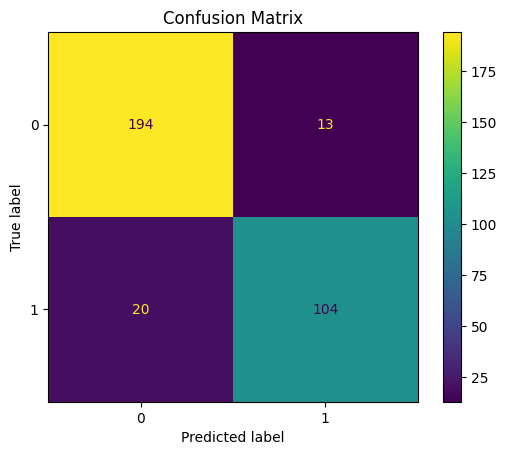

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

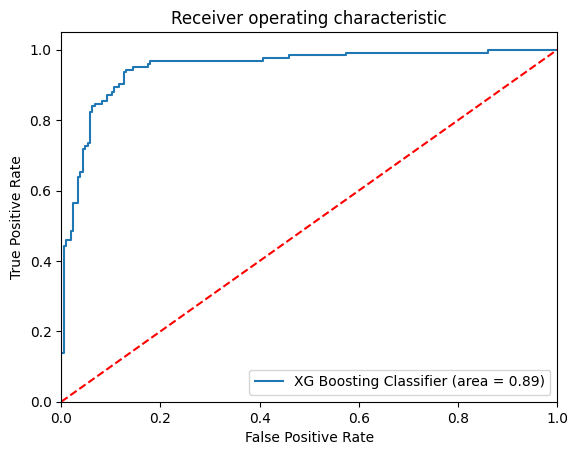

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, proba)  # Remove the second index
plt.figure()
plt.plot(fpr, tpr, label='XG Boosting Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


**CLASS IMBALANCE TREATMENT**

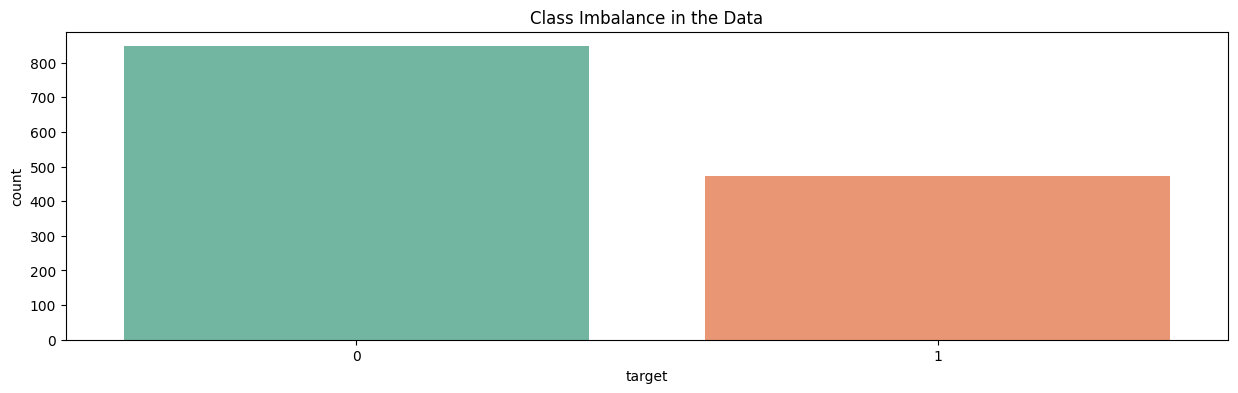

In [ ]:
plt.figure(figsize=(15,4))
sns.countplot(x=y_train,palette='Set2')
plt.title('Class Imbalance in the Data')
plt.show()

In [ ]:
(y_train.value_counts()*100)/len(y_train)

0    64.118092
1    35.881908
Name: target, dtype: float64

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smot = SMOTE(random_state=42)
X_train_smot,y_train_smot = smot.fit_resample(X_train,y_train.ravel())

In [ ]:
X_train_smot.shape,y_train_smot.shape

((1694, 15), (1694,))

In [ ]:
X_test.shape,y_test.shape

((331, 15), (331,))

In [ ]:
from collections import Counter
c = Counter(y_train_smot)
print(c)

Counter({0: 847, 1: 847})


**Random Forest Classifier**

In [ ]:
clf = RandomForestClassifier()
clf.fit(X_train_smot,y_train_smot)

RandomForestClassifier()

In [ ]:
# param_grid = {
#     'n_estimators':list(range(10,20)),
#     'max_features': ['auto', 'sqrt', 'log2'],
#     'max_depth' : [4,5,6,7,8],
#     'criterion' :['gini', 'entropy']
# }

In [ ]:
# clf = GridSearchCV(clf,param_grid,cv=10,scoring='recall')
# clf.fit(X_train_smot,y_train_smot)

In [ ]:
# clf.best_params_

In [ ]:
clf = RandomForestClassifier(criterion='gini',max_depth=8,
                           max_features='sqrt',n_estimators= 19)
clf.fit(X_train_smot,y_train_smot)

RandomForestClassifier(max_depth=8, n_estimators=19)

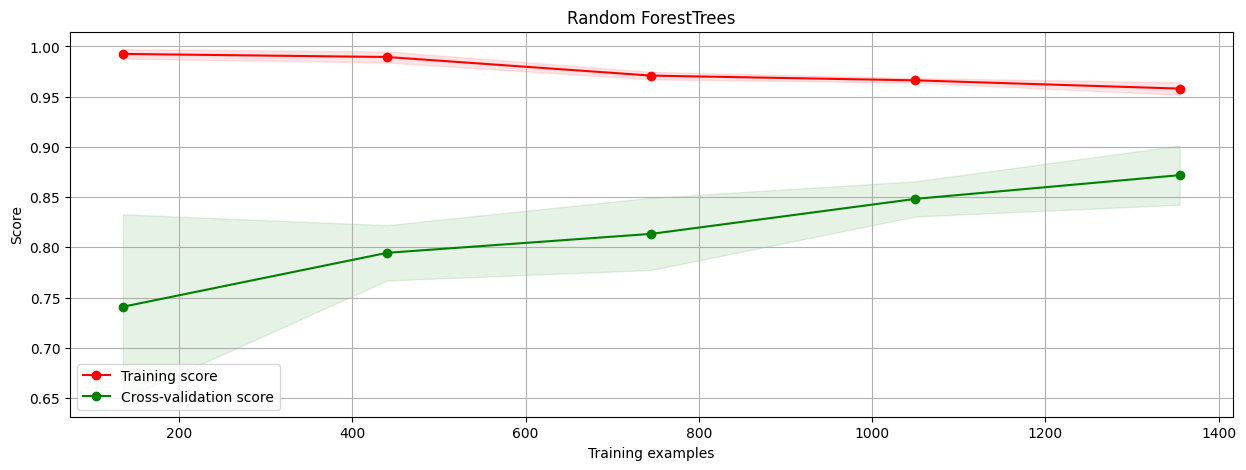

In [ ]:
plot_learning_curve(clf, X_train_smot, y_train_smot, "Random ForestTrees")

In [ ]:
y_pred = clf.predict(X_test)
print('-'*70)
print(classification_report(y_test, y_pred))
print('-'*70)
print('Confusion Metrix')
cm3 = confusion_matrix(y_test, y_pred)
print(confusion_matrix(y_test, y_pred))

----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.94      0.86      0.90       207
           1       0.80      0.90      0.85       124

    accuracy                           0.88       331
   macro avg       0.87      0.88      0.87       331
weighted avg       0.89      0.88      0.88       331

----------------------------------------------------------------------
Confusion Metrix
[[179  28]
 [ 12 112]]


In [ ]:
rf_clf_imp2= clf.feature_importances_

**Gradient Boosting**

In [ ]:
gbc2 = GradientBoostingClassifier()
gbc2.fit(X_train_smot, y_train_smot)
y_pred1 = gbc2.predict(X_test)
gbc_clf_imp2 = gbc2.feature_importances_
print('-'*60)
print(classification_report(y_test, y_pred1))
print('-'*60)
cm4 = confusion_matrix(y_test, y_pred1)
print('Confusion Matrix')
print(cm4)
print('-'*60)

------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.93      0.89      0.91       207
           1       0.83      0.90      0.86       124

    accuracy                           0.89       331
   macro avg       0.88      0.89      0.89       331
weighted avg       0.90      0.89      0.89       331

------------------------------------------------------------
Confusion Matrix
[[185  22]
 [ 13 111]]
------------------------------------------------------------


**Results Evaluation**

**Classification Report**

In [ ]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91       207
           1       0.83      0.90      0.86       124

    accuracy                           0.89       331
   macro avg       0.88      0.89      0.89       331
weighted avg       0.90      0.89      0.89       331



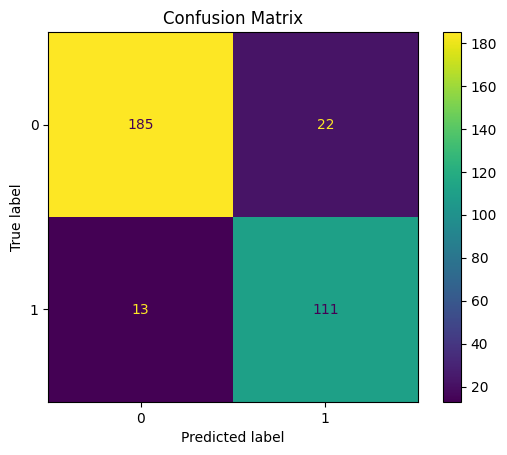

In [ ]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred1)
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.title('Confusion Matrix')
plt.show()

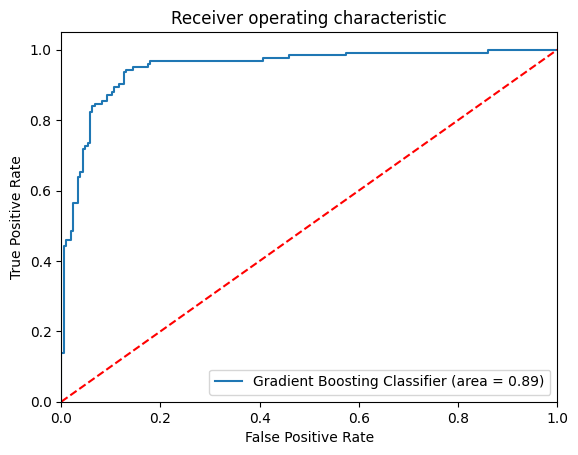

In [ ]:
logit_roc_auc = roc_auc_score(y_test, y_pred1)
fpr, tpr, thresholds = roc_curve(y_test, proba)  # Remove the second index
plt.figure()
plt.plot(fpr, tpr, label='Gradient Boosting Classifier (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()


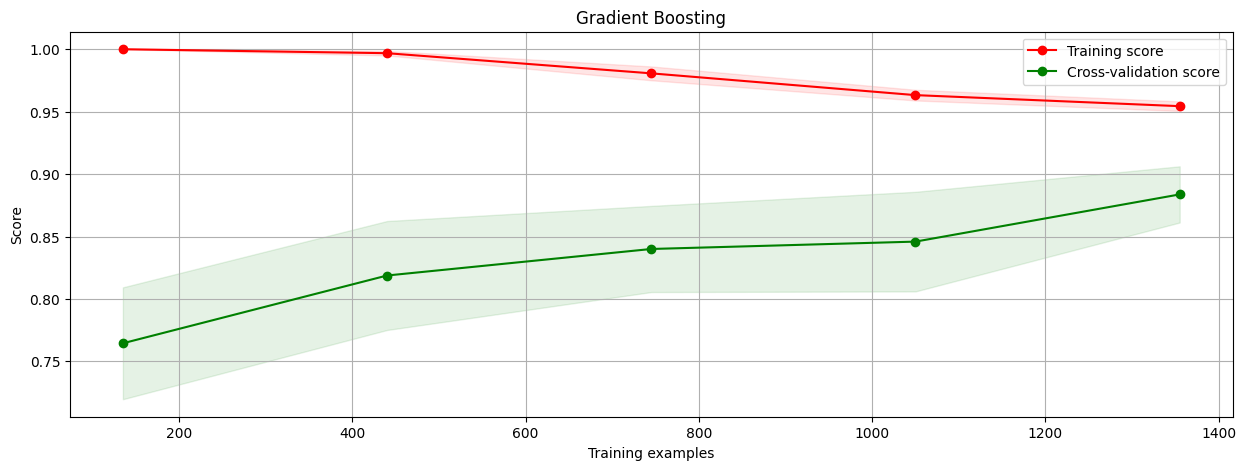

In [ ]:
plot_learning_curve(gbc2, X_train_smot, y_train_smot, "Gradient Boosting")

In [ ]:
data1 = pd.DataFrame({'Column_Name':X.columns,
                    'RandomForestClassifier':rf_clf_imp1,
                    'XGBClassifier':gbc_clf_imp1})

In [ ]:
data2 = pd.DataFrame({'Column_Name':X.columns,
                    'RandomForestClassifier':rf_clf_imp2,
                    'XGBClassifier':gbc_clf_imp2})

In [ ]:
data1

,Column_Name,RandomForestClassifier,XGBClassifier
0,Reportings,0.230338,0.421027
1,Driver_ID,0.025732,0.012128
2,Age,0.029194,0.007990
3,Gender,0.005862,0.001376
4,Education_Level,0.007735,0.000961
5,Grade,0.043926,0.001752
6,Total Business Value,0.226913,0.124751
7,Income,0.081691,0.017332
8,Joining Designation,0.023819,0.005482
9,Quarterly Rating,0.032980,0.027930


In [ ]:
data2

,Column_Name,RandomForestClassifier,XGBClassifier
0,Reportings,0.167726,0.300373
1,Driver_ID,0.036138,0.009569
2,Age,0.041084,0.009480
3,Gender,0.013127,0.009140
4,Education_Level,0.023198,0.004790
5,Grade,0.024855,0.004796
6,Total Business Value,0.169963,0.205282
7,Income,0.155039,0.024937
8,Joining Designation,0.016230,0.003067
9,Quarterly Rating,0.035561,0.028597


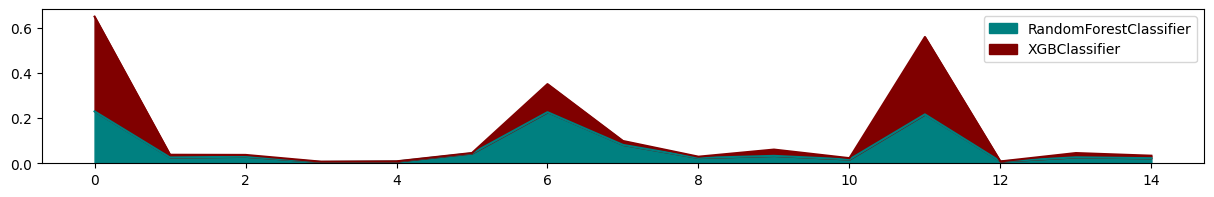

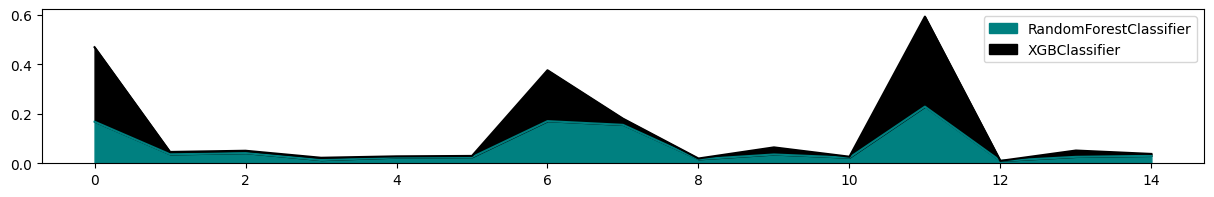

In [ ]:
data1.plot(kind="area", figsize = (15,2),color=['teal','maroon'])

data2.plot(kind="area", figsize = (15,2),color=['teal','black'])

plt.show()

In [ ]:
# calculating precision, reall and f1_score for every
tp1,fp1,fn1,tn1 =cm1[0][0],cm1[0][1],cm1[1][0],cm1[1][1]
tp2,fp2,fn2,tn2 =cm2[0][0],cm2[0][1],cm2[1][0],cm2[1][1]
tp3,fp3,fn3,tn3 =cm3[0][0],cm3[0][1],cm3[1][0],cm3[1][1]
tp4,fp4,fn4,tn4 =cm4[0][0],cm4[0][1],cm4[1][0],cm4[1][1]
precision1 = tp1/(tp1+fp1)
recall1 = tp1/(tp1+fn1)
precision2 = tp2/(tp2+fp2)
recall2 = tp2/(tp2+fn2)
precision3 = tp3/(tp3+fp3)
recall3 = tp3/(tp3+fn3)
precision4 = tp4/(tp4+fp4)
recall4 = tp4/(tp4+fn4)
f1_1 = (2*precision1*recall1)/(precision1+recall1)
f1_2 = (2*precision2*recall2)/(precision2+recall2)
f1_3 = (2*precision3*recall3)/(precision3+recall3)
f1_4 =(2*precision4*recall4)/(precision4+recall4)

In [ ]:
df = pd.DataFrame({'Model':['RandomForest','GradientBoosting','RandomForest','GradientBoosting'],
                  'Class':['imbalanced','imbalanced','balanced','balanced'],
                  'True_pos':[tp1,tp2,tp3,tp4],
                  'Fal_pos':[fp1,fp2,fp3,fp4],
                  'Fal_neg':[fn1,fn2,fn3,fn4],
                  'True_neg':[tn1,tn2,tn3,tn4],
                  'F1_score%':[f1_1*100,f1_2*100,f1_3*100,f1_4*100],
                  'Precision%':[precision1*100,precision2*100,precision3*100,precision4*100],
                  'Recall%':[recall1*100,recall2*100,recall3*100,recall4*100]})

In [ ]:
df

,Model,Class,True_pos,Fal_pos,Fal_neg,True_neg,F1_score%,Precision%,Recall%
0,RandomForest,imbalanced,189,18,25,99,89.786223,91.304348,88.317757
1,GradientBoosting,imbalanced,194,13,20,104,92.161520,93.719807,90.654206
2,RandomForest,balanced,179,28,12,112,89.949749,86.473430,93.717277
3,GradientBoosting,balanced,185,22,13,111,91.358025,89.371981,93.434343


In [ ]:
# df.plot(kind="bar", figsize = (15,5),colormap='cividis')
# plt.title('Representation of True Positives, True Negatives,False Positives, False Negatives and F1_score of all the Models')
# plt.show()
# ,color=['red','blue','olive','teal','maroon']

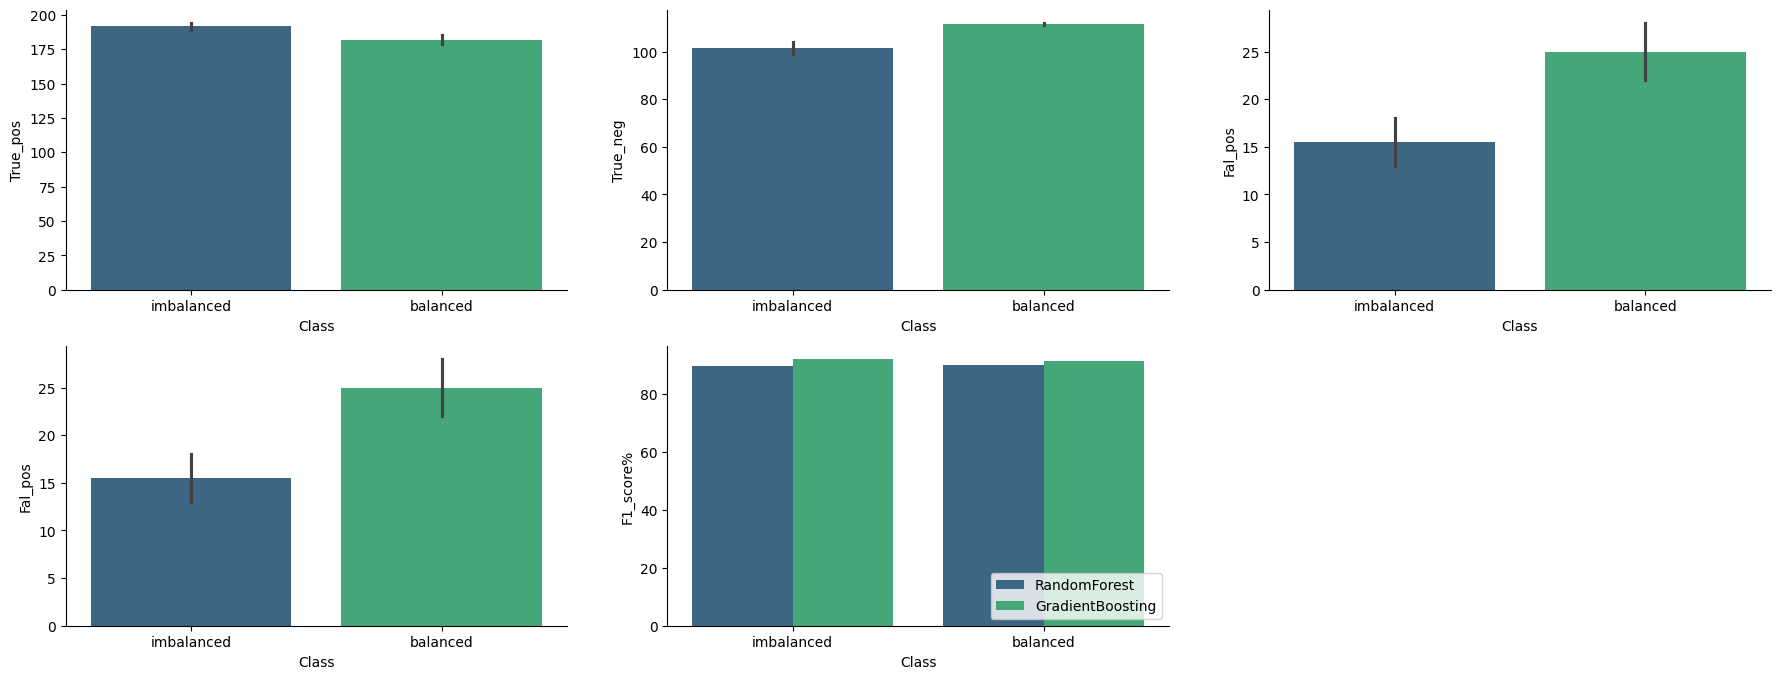

In [ ]:
plt.figure(figsize=(22,8))
plt.subplot(2,3,1)
sns.barplot(x=df.Class,y=df.True_pos,palette='viridis')
# plt.show()
plt.subplot(2,3,2)
sns.barplot(x=df.Class,y=df.True_neg,palette='viridis')
# plt.show()
plt.subplot(2,3,3)
sns.barplot(x=df.Class,y=df.Fal_pos,palette='viridis')
# plt.show()
plt.subplot(2,3,4)
sns.barplot(x=df.Class,y=df.Fal_pos,palette='viridis')
plt.subplot(2,3,5)
sns.barplot(x=df.Class,y=df['F1_score%'],palette='viridis',hue=df.Model)
plt.legend(loc='lower right')
sns.despine()
plt.show()

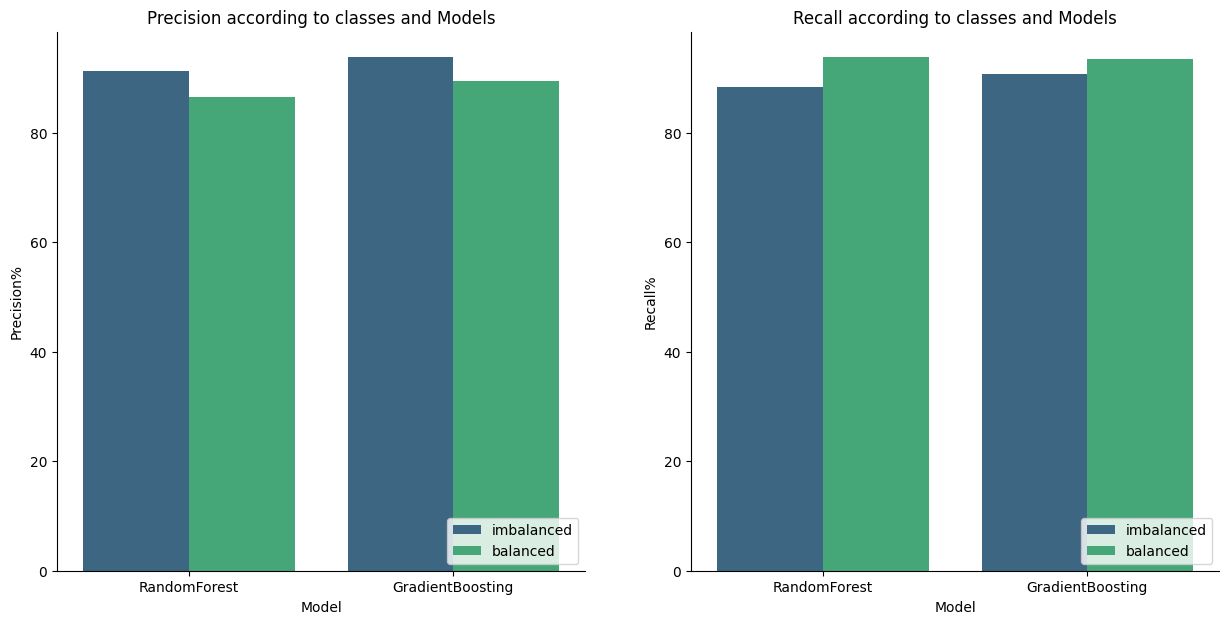

In [ ]:
plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
sns.barplot(x=df.Model,y=df['Precision%'],hue=df.Class,palette='viridis')
plt.title('Precision according to classes and Models')
plt.legend(loc='lower right')
plt.subplot(1,2,2)
sns.barplot(x=df.Model,y=df['Recall%'],hue=df.Class,palette='viridis')
plt.title('Recall according to classes and Models')
plt.legend(loc='lower right')
sns.despine()
plt.show()

**INSIGHTS**




*   So we see that there are 57% male employees and 43% female employees.

*   The percentages of employees with different education levels are almost same for level 1 & 2.

*   97.3% of the employees who did not get a raise.

*   Almost 43% of the employees joined at lowest designation (1). 34% joined at level 2, 20% at level 3 and below 2% joined at higher levels.

*   Majority (35%) of the employees currently are at designation level 2, followed by designation level 1 (31%) and 3 (26%). Less than 5% of the employees are currently in higher designations.

*   Only 54.6% of the employees received a promotion, while 45.4% did not. However, only 2.6% received a raise in income.

*   Number of employees has been increase with increase in year as well as number of reportings.

*   The majority of the employees seem to be associated with city C20.

*   Scatter plot of Income shows that Income increases with increase in age but after 45-50, we see a subtle decline.

*   Scatter plot of Total Business Value shows an increase with increase in Age yet we notice a decline after 45.

*   Income decreses with increase in Destination as about 4% of the employees hold higher designations.

*   The median of the Income for employees having higher Grades is greater.

*   Distribution of Income for enployes at different Education level is about a change of 3-5% with level 0.

*   Joining Designation Increases with increase in Grade.

*   Top reporting days is 24 days.

*   About 55% of the reportings of the employees has got Quarlerly Rating 1.

*   Number of reportings increases with increase in Income as well as Total Business Value.

*   Recall increased after treatment of data imbalance and is performing bettee in Gradient Boosting.

*   Precision dropped after treatment of data imbalance and is performing better in Random Forest.

*   F1_score incresed after the treatment of imabalanced data and in Gradient Boosting.